<h1>Czy klient upomni się o odszkodowanie czy nie?REGRESJA LOGISTYCZNA <h1>

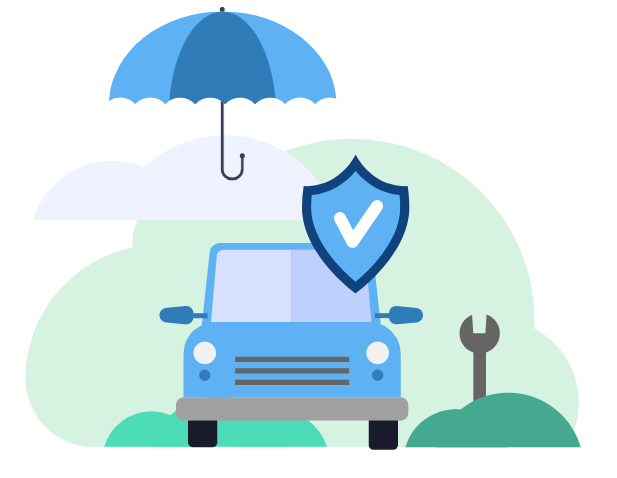

<h2>Sformułowanie problemu<h2>


W tym przykładzie chcemy zbadać, "jakie czynniki/zmienne wpływają na to czy klient dostanie odszkodowanie?".

Bedziemy przewidywac te DWIE opcje na podstawie jego charakterystyki

Dlatego zmienną zależną (y) jest to czy dostanie (Tak/Nie) .

Poniższy notebook jest stworzony, by zaprezentować użycie REGRESJI LOGISTYCZNEJ.

<h2>Import pakietow<h2>

In [148]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Pakiety/biblioteki
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

%matplotlib inline

# 

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# zwiekszenie wilkosci sns plotow
sns.set(rc={'figure.figsize':(12,10)})



<h2>Załadowanie danych<h2>

Zrodlo danych: https://www.kaggle.com/datasets/sagnik1511/car-insurance-data/code?datasetId=1450044&sortBy=voteCount

In [3]:
# Załadowanie danych
raw_data = pd.read_csv(r"Car_Insurance_Claim.csv", encoding='latin-1')

# jaki ksztalt maja dane?
print(raw_data.shape)

#wyswietl pierwsze 5 wierszy
raw_data.head(5)

(10000, 19)


,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,sedan,2,0,1,1


<h2>Zamienie teraz te kolumny na dane kategorie<h2>

WIEK
    
*16-25-kategoria"Young"

*26-39-"Middle Age"

*40-64-"Old"

*65+-"Very Old"

DOSWIADCZENIE

*0-9LAT-"Newbie"

*10-19LAT-"Amateur"

*20-29LAT-"Advanced"

*30+LAT-"Ekspert"



In [4]:
raw_data["AGE"].replace({"16-25": "Young", "26-39": "Middle Age","40-64":"Old","65+":"Very Old"}, inplace=True)
raw_data["DRIVING_EXPERIENCE"].replace({"0-9y": "Newbie", "10-19y": "Amateur","20-29y":"Advanced","30y+":"Expert"}, inplace=True)


<h2>O zbiorze danych<h2>

Kolumny przypominają cechy świata praktycznego.
Kolumna wyniku wskazuje 1, jeśli klient zażądał spłaty kredytu, w przeciwnym razie 0.
Dane mają 19 cech, z których 18 to odpowiednie dzienniki pobrane przez firmę.

Credit score-Scoring kredytowy – metoda oceny wiarygodności podmiotu ubiegającego się o kredyt bankowy. Wynik scoringu kredytowego jest zwykle przedstawiany w postaci punktowej – zwykle im więcej punktów, tym większa wiarygodność kredytowa potencjalnego kredytobiorcy.


annual milleage-roczny przebieg samochodu

<h2>EDA<h2>

<h2>Wyświetlanie kolumn<h2>

<h3>Sprawdzanie wartosci zerowych<h3>

In [5]:
raw_data.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

<h3>Wypelnianie pustych wartosci<h3>

Jedną z kluczowych kwestii jest podjęcie decyzji, którą z wymienionych technik imputacji zastosować, aby uzyskać najbardziej efektywną wartość dla brakujących wartości.


Wykresy, takie jak wykresy pudełkowe i wykresy dystrybucyjne, są bardzo pomocne przy podejmowaniu decyzji o tym, jakie techniki zastosować.

C:\Users\weron\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\weron\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ANNUAL_MILEAGE', ylabel='Density'>

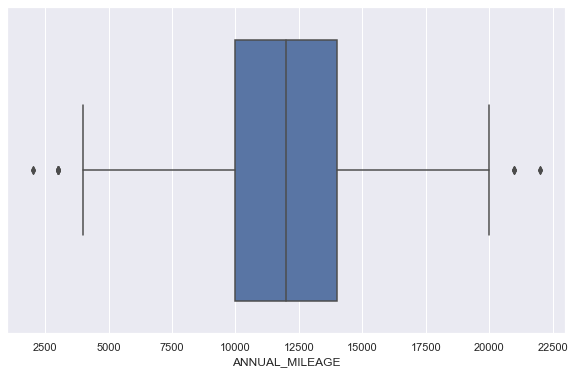

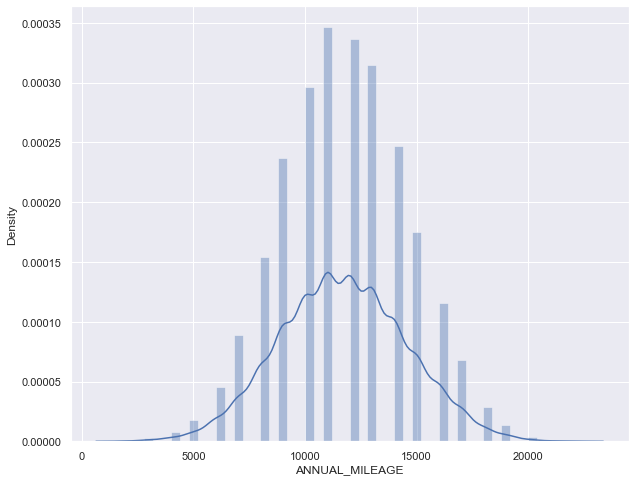

In [6]:
fig, ax=plt.subplots(figsize=(10,6))
sns.boxplot(raw_data.ANNUAL_MILEAGE)

fig, ax=plt.subplots(figsize=(10,8))
sns.distplot(raw_data.ANNUAL_MILEAGE)

Oto jak wyglądałby wykres pudełkowy. Można zauważyć, że dane są skośne. Istnieje kilka lub duża liczba punktów danych, które działają jak wartości odstające. Odstające punkty danych będą miały znaczący wpływ na średnią i dlatego w takich przypadkach nie zaleca się stosowania średniej do zastępowania brakujących wartości. Użycie wartości średnich do zastąpienia brakujących wartości może nie stworzyć dobrego modelu i dlatego zostaje wykluczone. W przypadku symetrycznego rozkładu danych do imputacji brakujących wartości można użyć wartości średniej.

Wiec kiedy wyklres jest skosny rowniez nie poleca sie uzycia sredniej. Polecane w takim przypadku jest  więc użyć mediany.Wiec tu wlanie jej uzywam.

C:\Users\weron\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\weron\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CREDIT_SCORE', ylabel='Density'>

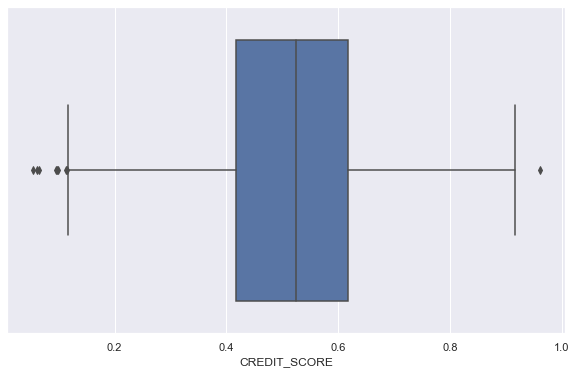

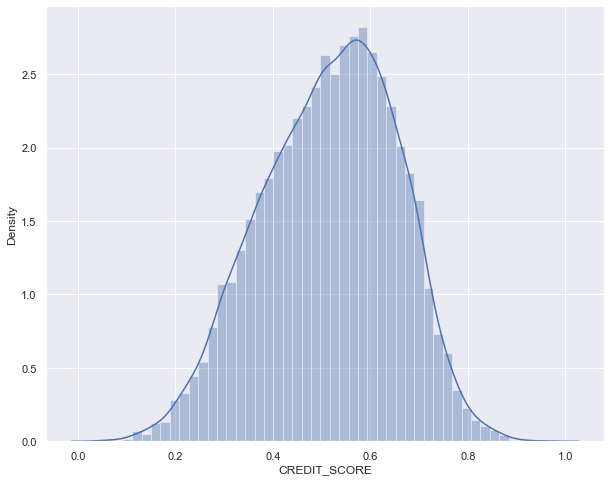

In [7]:
fig, ax=plt.subplots(figsize=(10,6))
sns.boxplot(raw_data.CREDIT_SCORE)

fig, ax=plt.subplots(figsize=(10,8))
sns.distplot(raw_data.CREDIT_SCORE)

Wypelniamy je mediana czyli najczesciej wystepujaca wartoscia w danej kolumnie, aby nie tracici niepotrzebnie prawie 2000 linijek danych.


In [8]:
raw_data['CREDIT_SCORE'].fillna(raw_data['CREDIT_SCORE'].median(), inplace=True)
raw_data['ANNUAL_MILEAGE'].fillna(raw_data['ANNUAL_MILEAGE'].median(), inplace=True)


<h2>Usuniecie outlierow<h2>

Przyjrzyjmy się juz wyzej analizowanym zmiennym. Są to zmienne, ktore zawieraja wartosci liczbowe(w zbiorze ejst te znp mnostwo zmiennyc binarnych,opisowych ktore zmaienie na binarne lub takich ktorych outliery sa bez sensu dla analizowania jak ID czy tez postal code)

In [9]:
new=raw_data[['CREDIT_SCORE','ANNUAL_MILEAGE']]

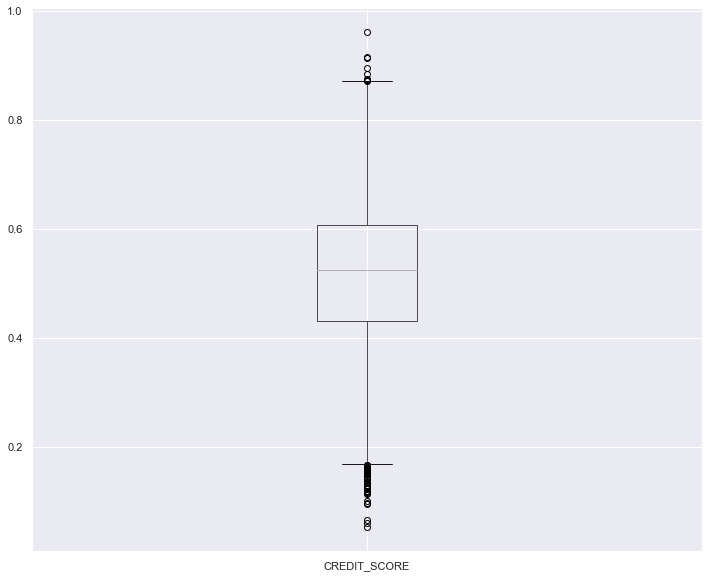

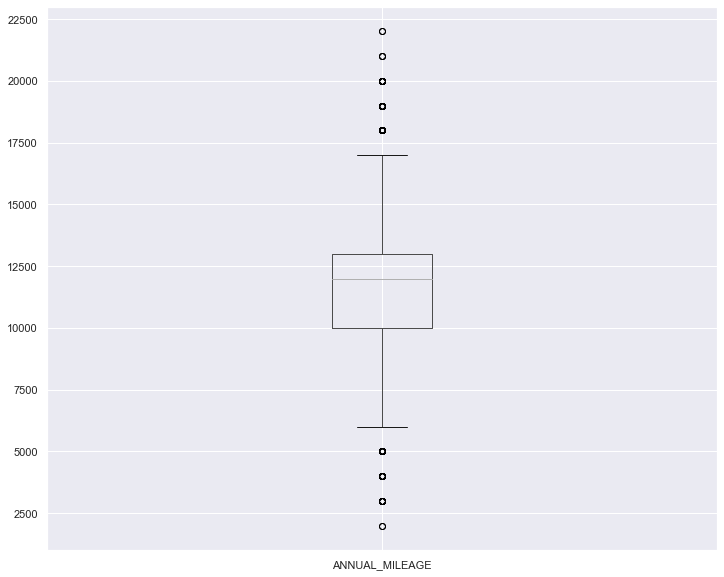

In [10]:
import matplotlib.pyplot as plt

for column in new:
    plt.figure()
    new.boxplot([column])

Widzimy, ze outliery sa dosyc daleko oddalone od mediany (kreseczka na srodku prostokata) wiec bez sensu jest zamieniac ja na mediane czy tez srednia.

Outliery zdecydowalam sie podmienic na wartossci znajdujace sie na "wasach"

W przypadku brakujących wartości, które leżą poza granicami 1,5 * IQR, możemy je ograniczyć, zastępując obserwacje poza dolną granicą wartością 5. percentyla, a te, które leżą powyżej górnej granicy - wartością 95. percentyla. Poniżej znajduje się przykładowy kod, który pozwala osiągnąć ten cel.

Aby to osiągnąć to, co chcesz, przydatna jest funkcja clip. Przypisuje ona wartości spoza granicy do wartości granicznych

In [11]:
p_05 = raw_data['CREDIT_SCORE'].quantile(0.05) # 5th quantile
p_95 = raw_data['CREDIT_SCORE'].quantile(0.95) # 95th quantile

p_05 = raw_data['ANNUAL_MILEAGE'].quantile(0.05) # 5th quantile
p_95 = raw_data['ANNUAL_MILEAGE'].quantile(0.95) # 95th quantile

raw_data['ANNUAL_MILEAGE'].clip(p_05, p_95, inplace=True)

<h2>Przyjrzenie się wszystkim wartosciom<h2>

In [12]:
#Zobaczenie jak wyglada kazda z cech  i wyswietlanie jej podgrup jesli<10

for column in raw_data:
    unique_values = np.unique(raw_data[column])
    nr_values = len(unique_values)
    if nr_values <= 10:
        print("Liczba wartości dla cechy {} jest: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("Liczba wartości dla cechy {} jest: {}".format(column, nr_values))

Liczba wartości dla cechy ID jest: 10000
Liczba wartości dla cechy AGE jest: 4 -- ['Middle Age' 'Old' 'Very Old' 'Young']
Liczba wartości dla cechy GENDER jest: 2 -- ['female' 'male']
Liczba wartości dla cechy RACE jest: 2 -- ['majority' 'minority']
Liczba wartości dla cechy DRIVING_EXPERIENCE jest: 4 -- ['Advanced' 'Amateur' 'Expert' 'Newbie']
Liczba wartości dla cechy EDUCATION jest: 3 -- ['high school' 'none' 'university']
Liczba wartości dla cechy INCOME jest: 4 -- ['middle class' 'poverty' 'upper class' 'working class']
Liczba wartości dla cechy CREDIT_SCORE jest: 9019
Liczba wartości dla cechy VEHICLE_OWNERSHIP jest: 2 -- [0 1]
Liczba wartości dla cechy VEHICLE_YEAR jest: 2 -- ['after 2015' 'before 2015']
Liczba wartości dla cechy MARRIED jest: 2 -- [0 1]
Liczba wartości dla cechy CHILDREN jest: 2 -- [0 1]
Liczba wartości dla cechy POSTAL_CODE jest: 4 -- [10238 21217 32765 92101]
Liczba wartości dla cechy ANNUAL_MILEAGE jest: 10 -- [7000.000000 8000.000000 9000.000000 10000.00000

Możemy teraz dokładniej spojrzec na strukture naszych danych i je zbadać.

<h2>Pairploty-jak je interpretować?<h2>

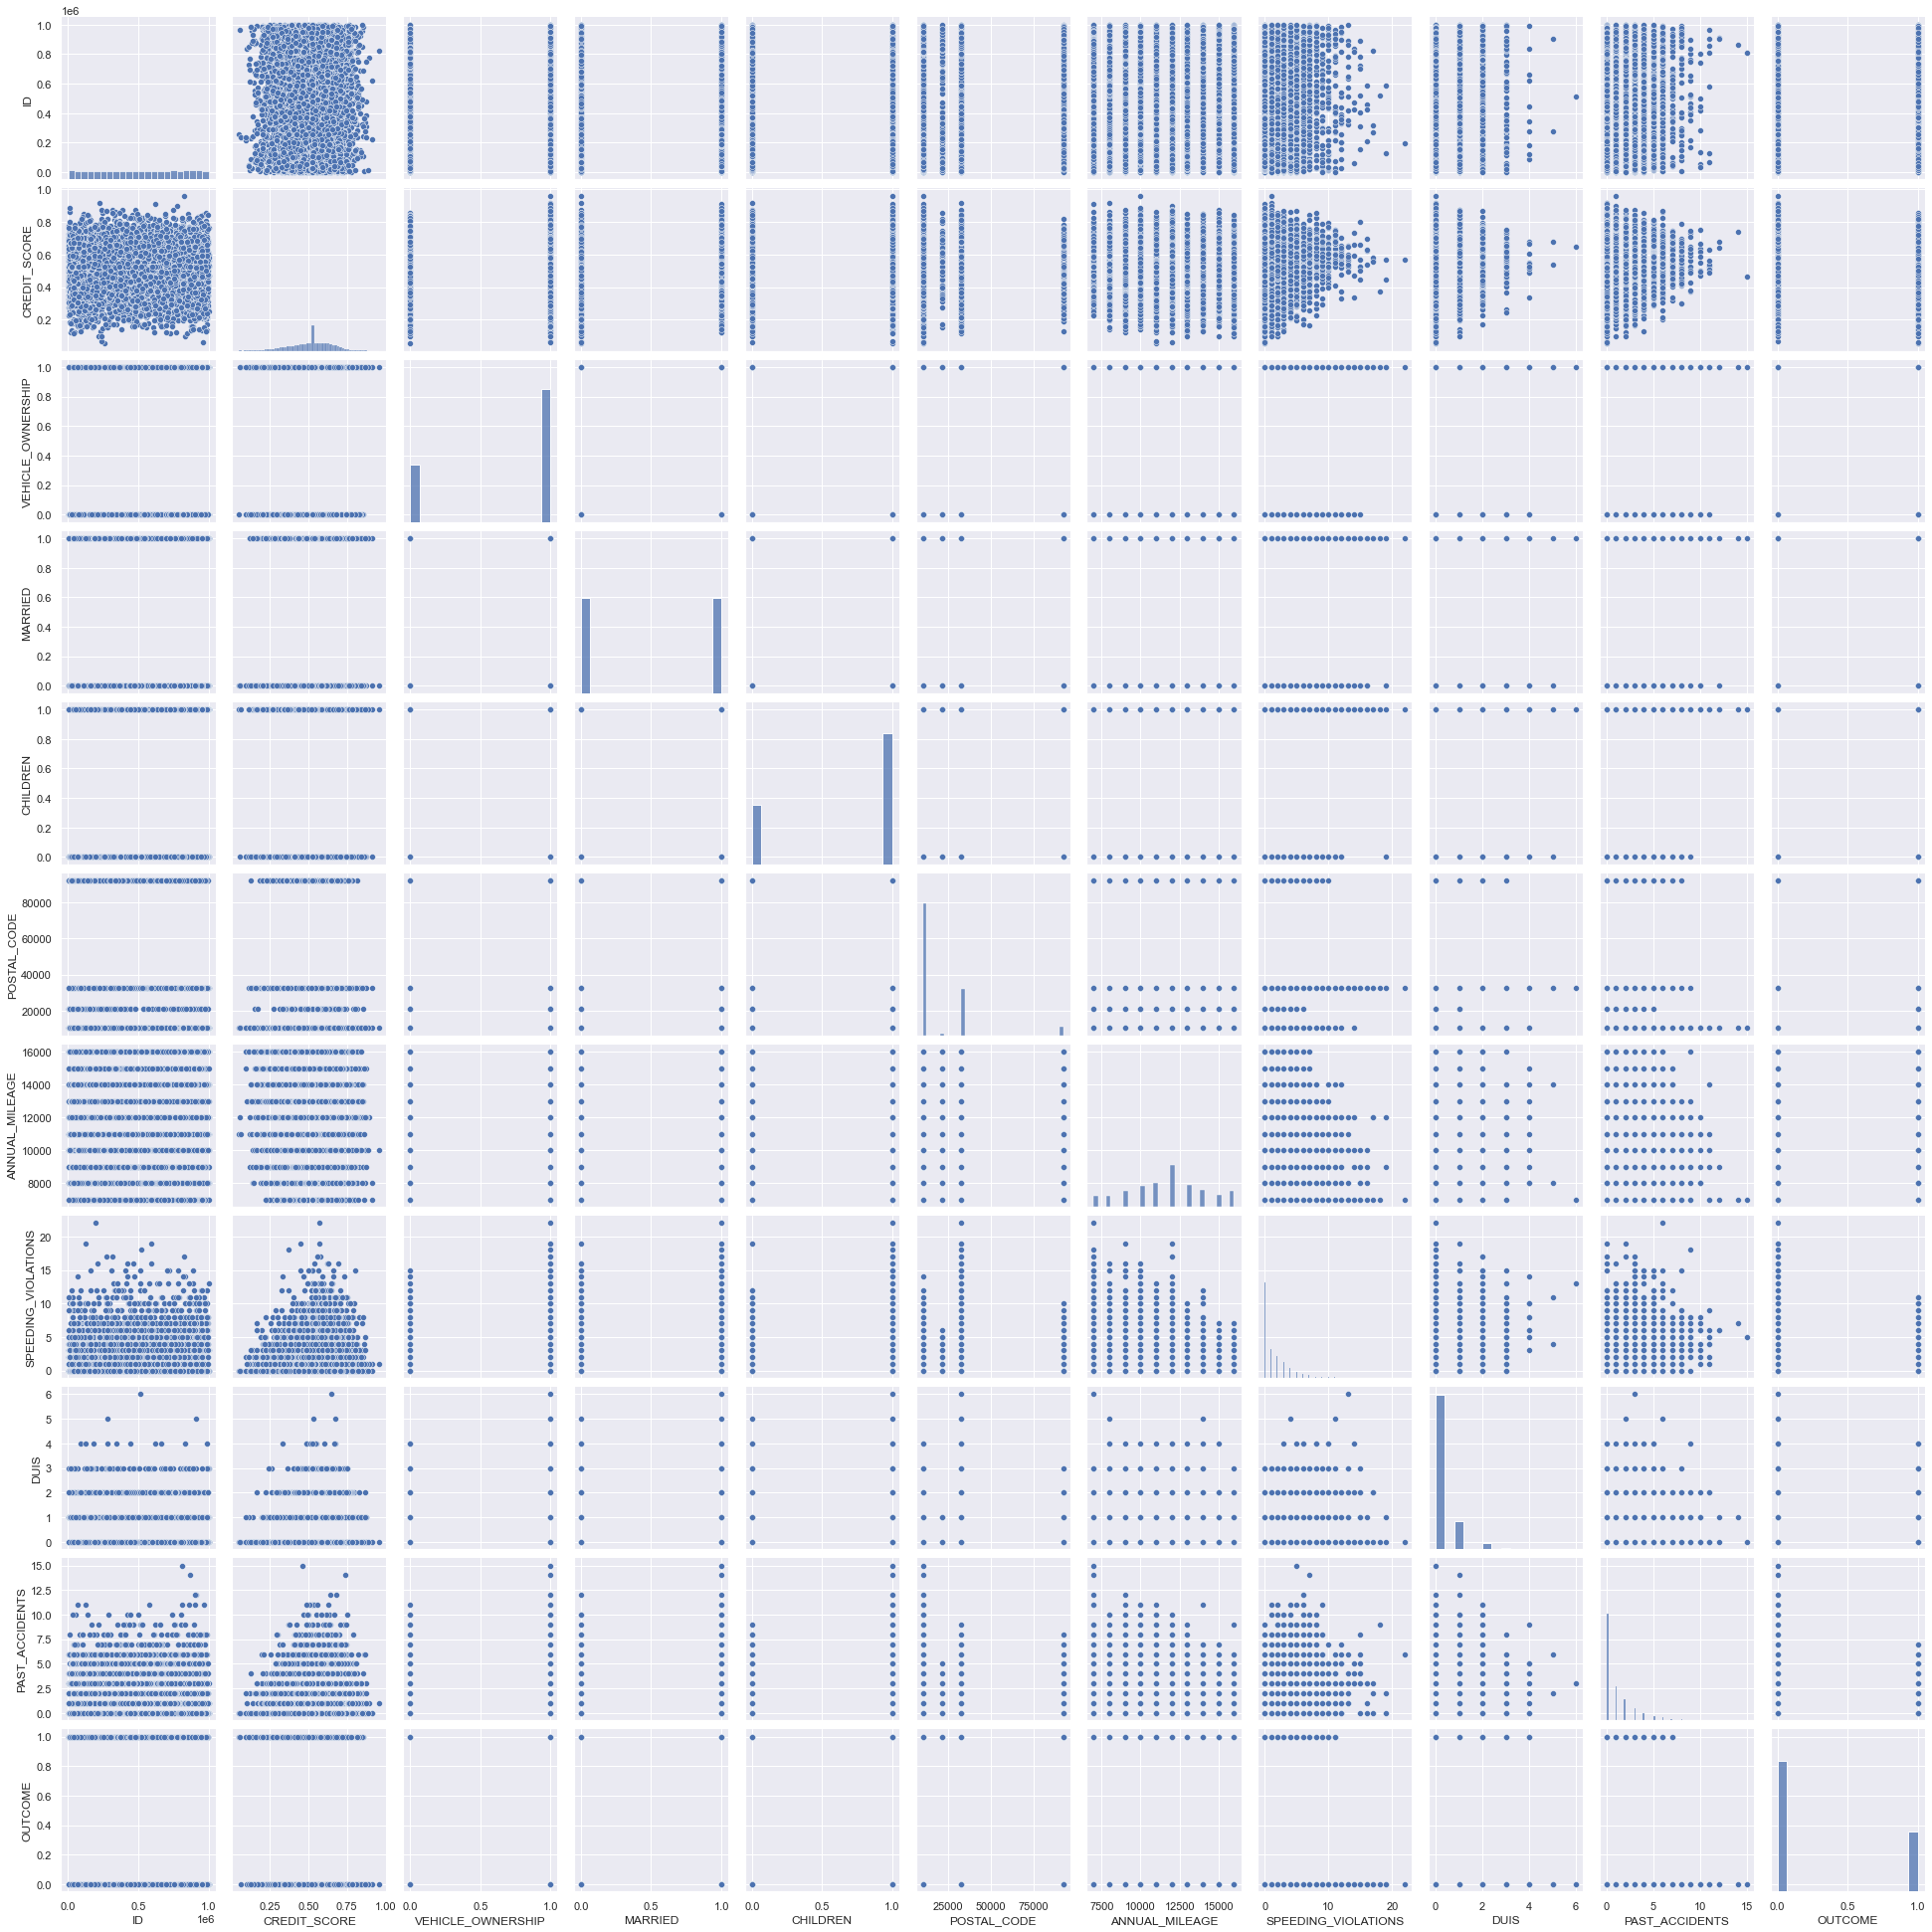

In [160]:
# Wizualizacja danych przy użyciu metody seaborn Pairplots

g = sns.pairplot(raw_data)

# Notes: Do not run this on a big dataset. Filter the columns first

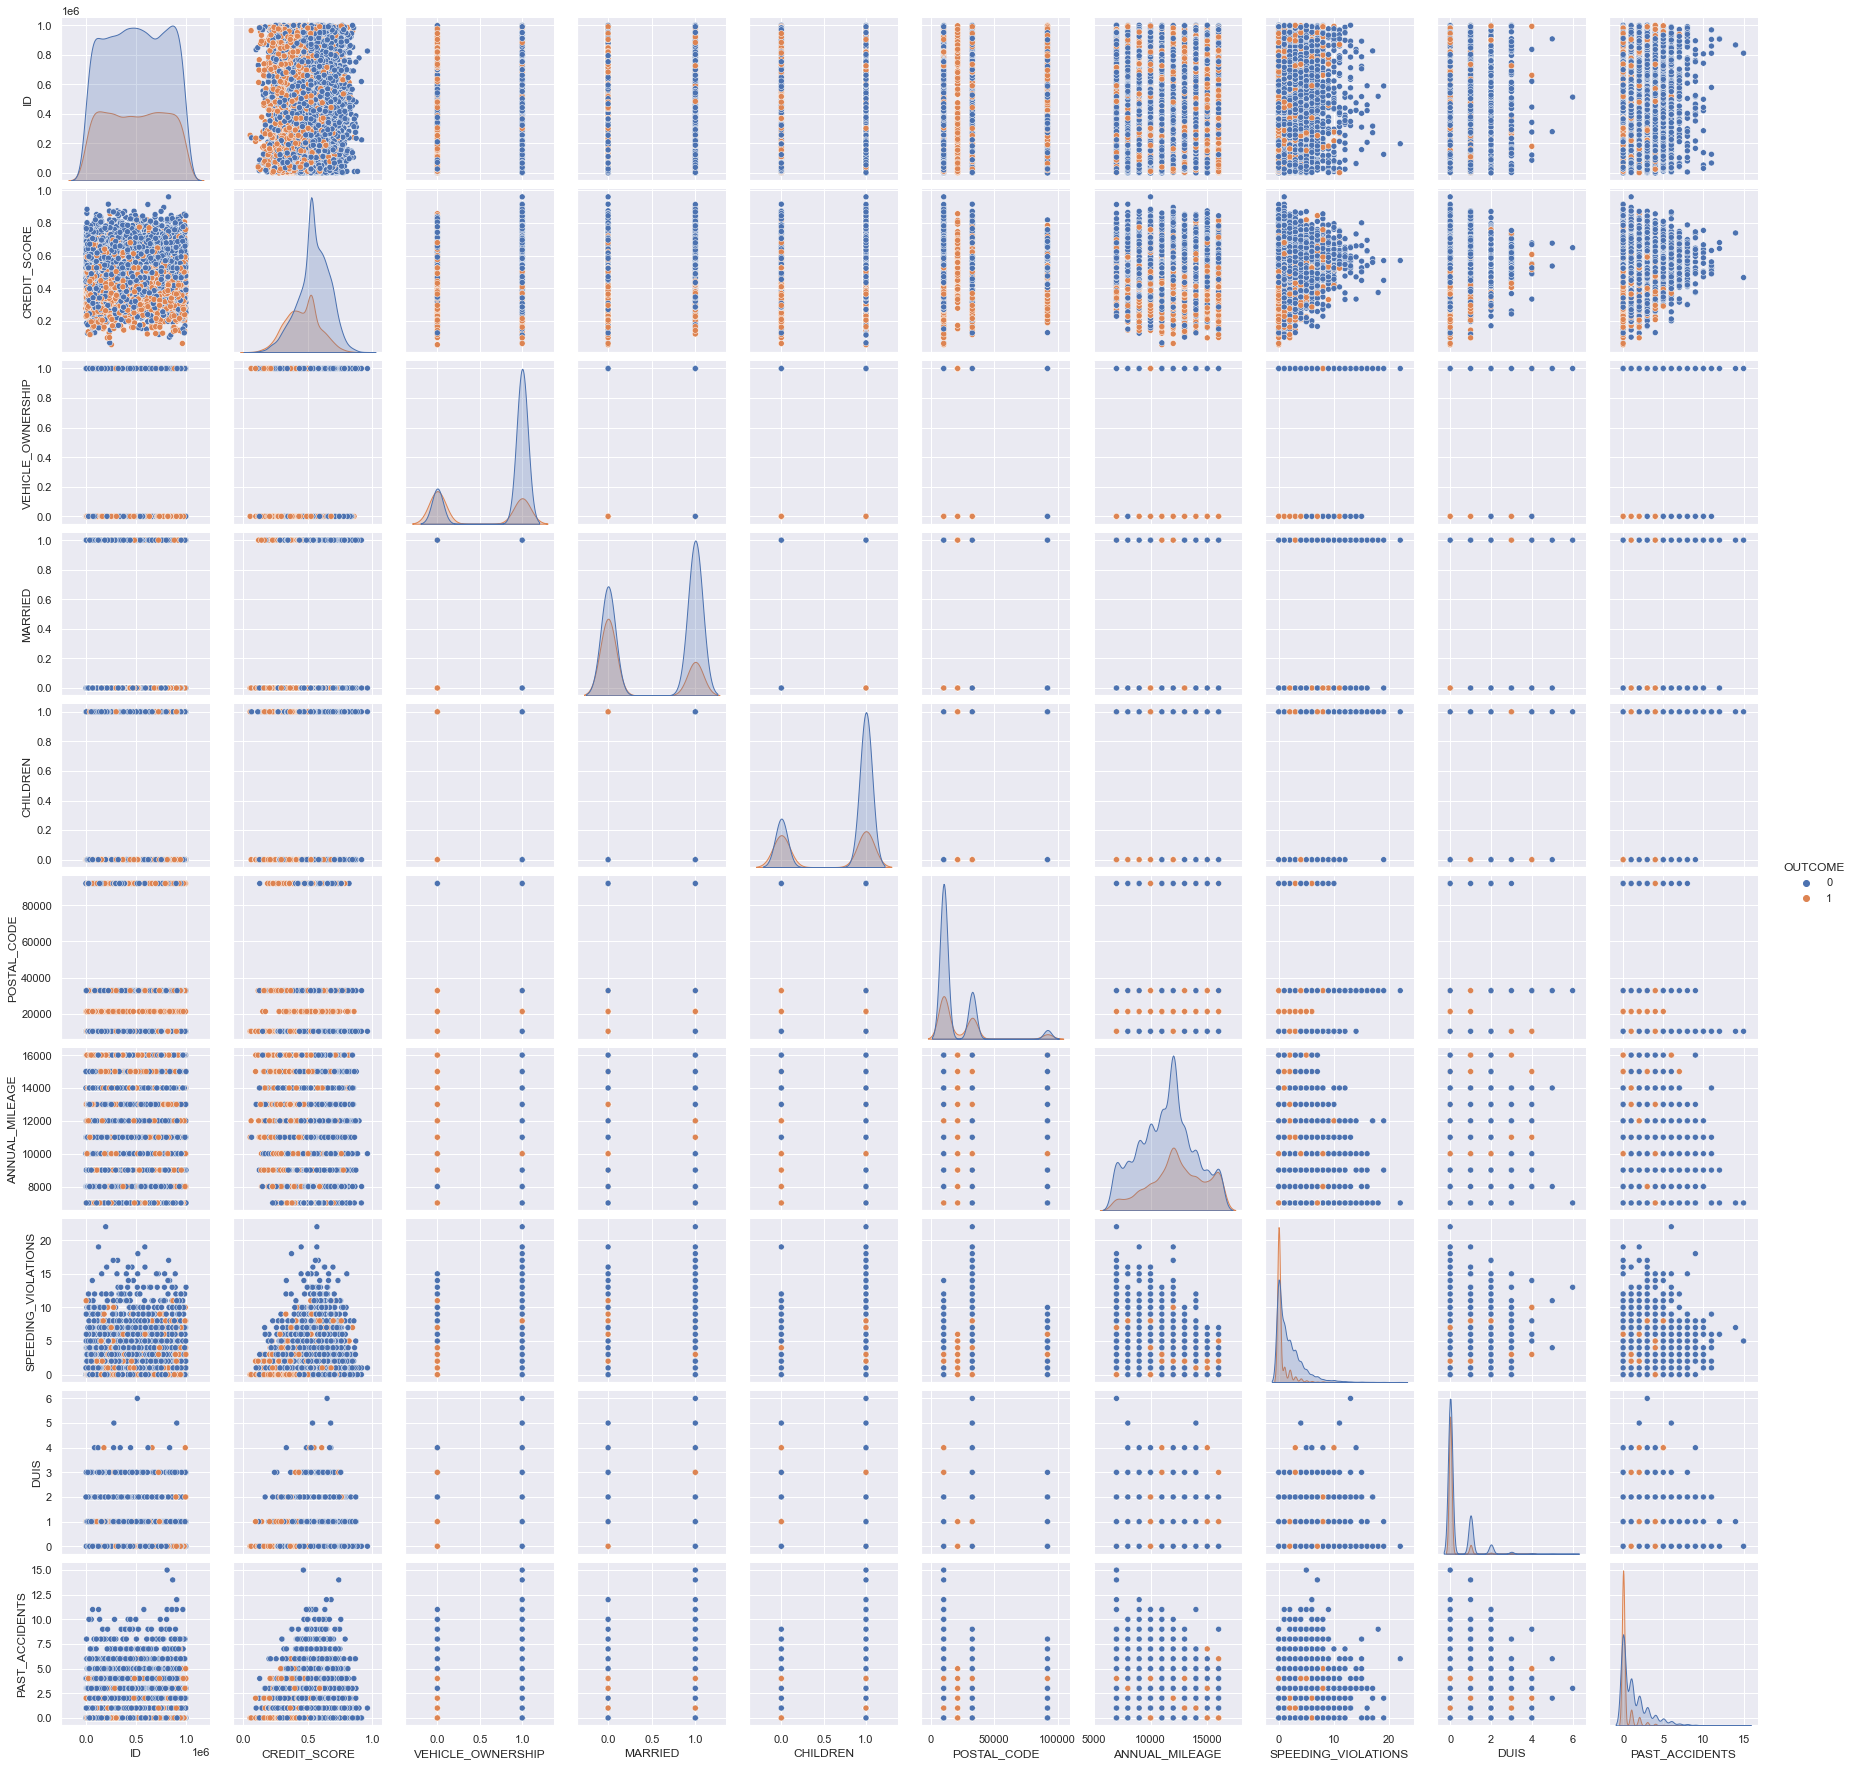

In [161]:
g = sns.pairplot(raw_data, hue = 'OUTCOME')

*Przyklad interpretacji:osoby ktorych przebieg samochodu jest wiekszy maja wieksze prawdopodobienstwo na wyplate odszkodowania.

*osoby z wieksza liczba incydentow maja wieksze prawdopodobienstwo
    
*osoby z dziecmi zadziej biora odszkodowanie i popleniaja szkody

*osoby z wysoka wiarygosdnoscia kredytowa maja mniejsza szanse na wyplayte odszkodowania

In [ ]:
g = sns.pairplot(raw_data, hue = 'AGE')

*Owoby bardzo wiekowe rzadziej wykonaja szkode,najczestszymi beneficjantami ubezpieczen sa ludzie w srednim wieku ora mlodzi.


<h2>A ile w tym zbiorze danych jest wgl danych i niedanych ubepzieczen?Przyjrzyjmy sie naszej zmiennej y <h2>

In [ ]:
sns.countplot(x = 'OUTCOME', data = raw_data, palette = 'Set2')

Widzimy, ze zdecydowanie wiecej osob nie dostalo odszkodowania.

<h2>A teraz zobaczmy bardziej czytelnie(można to wyczytać juz z pairplotow)-co wyplywa na to czy dostaniemy odszkodowanie czy nie?<h2>

In [13]:
raw_data.columns

Index(['ID', 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION',
       'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR',
       'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

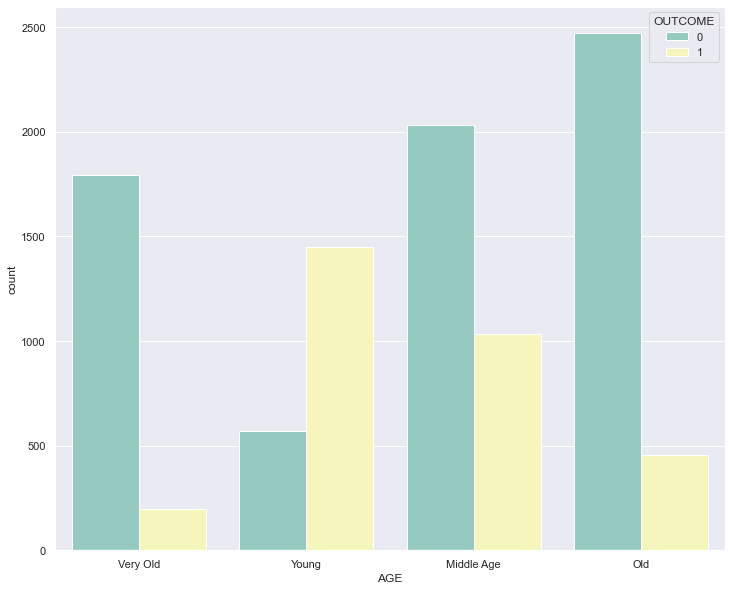

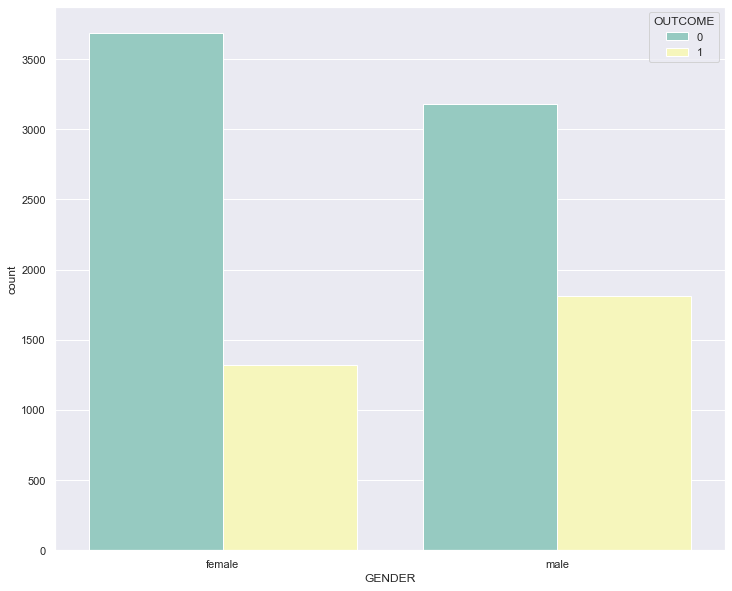

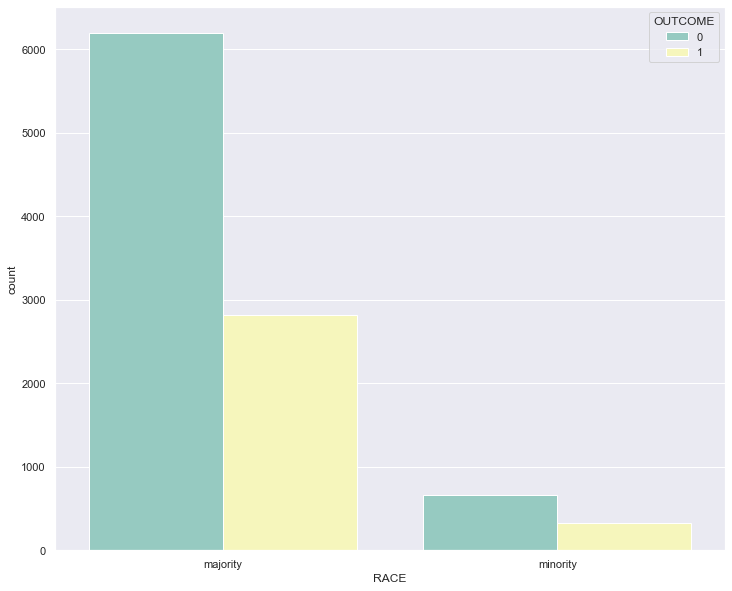

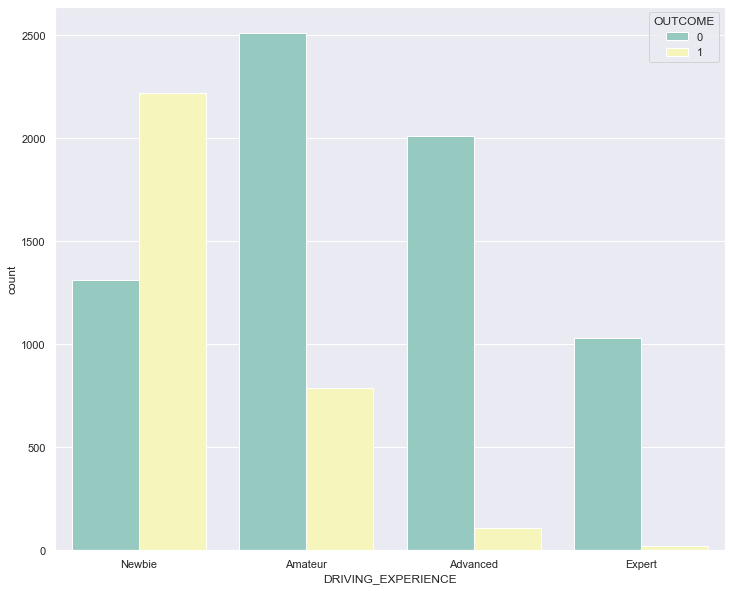

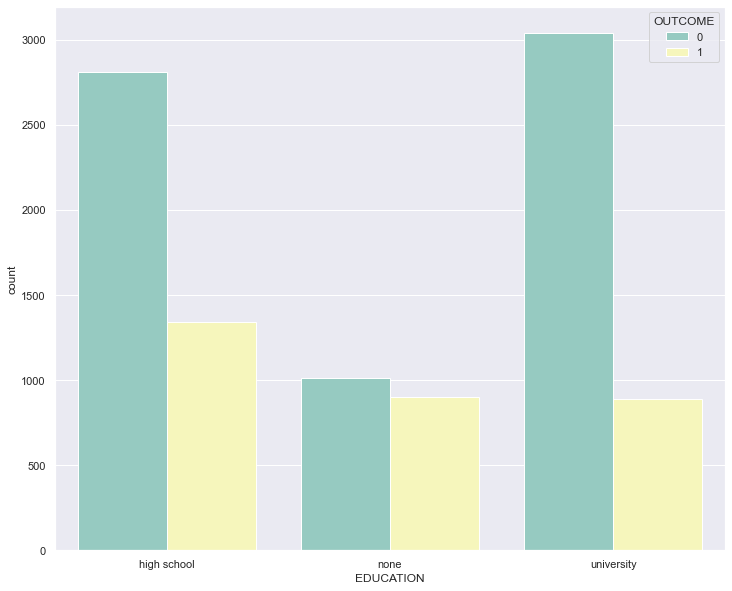

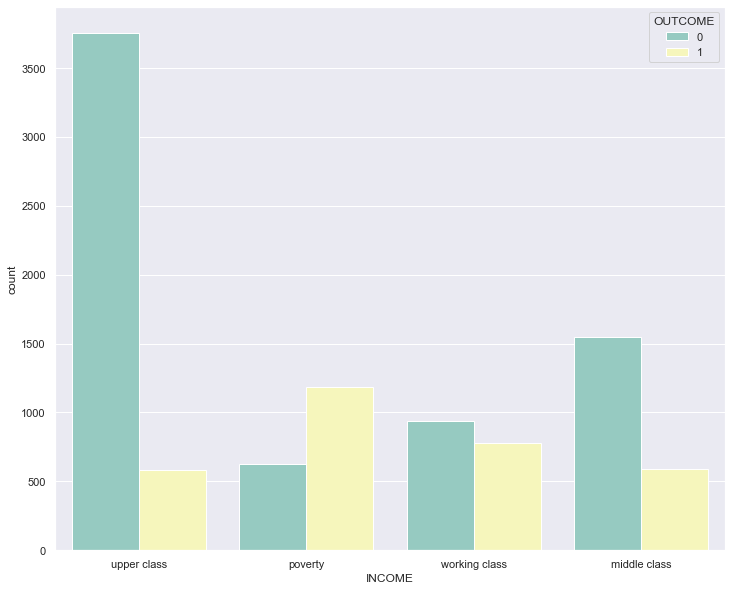

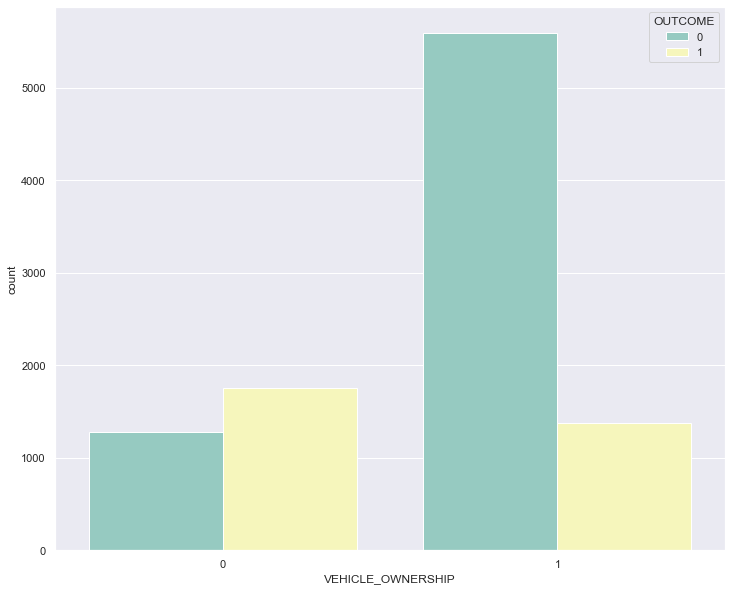

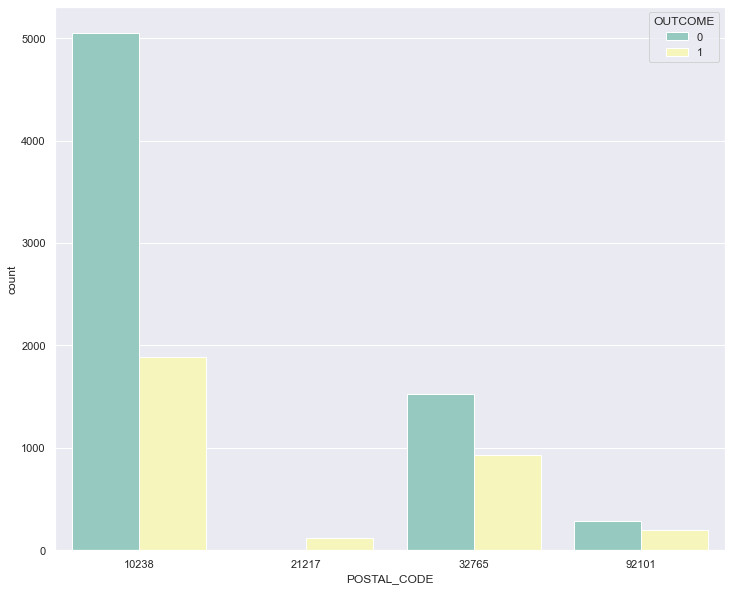

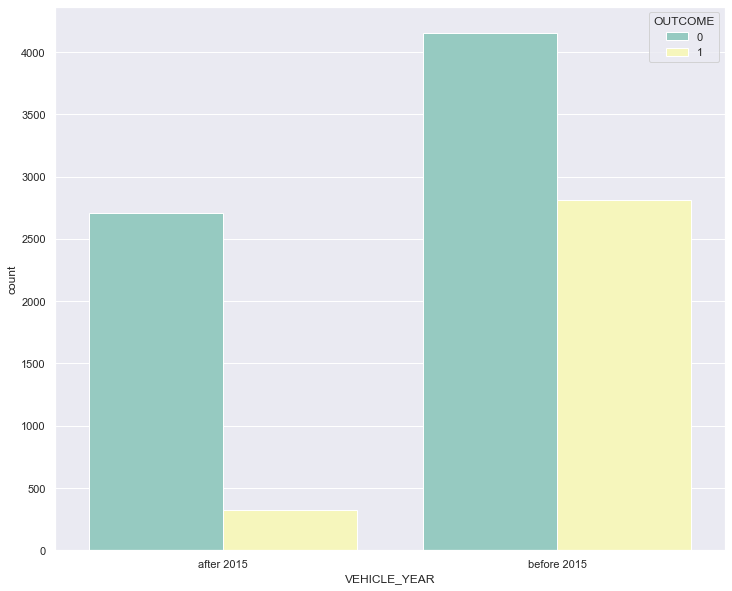

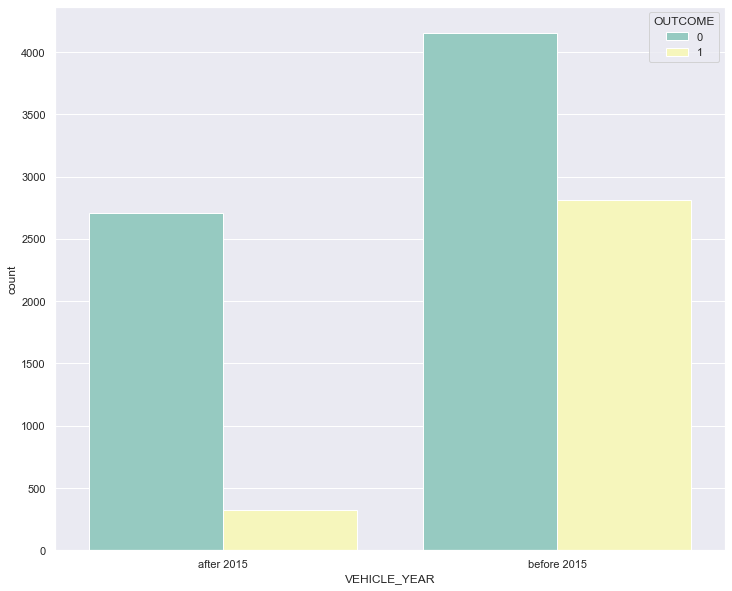

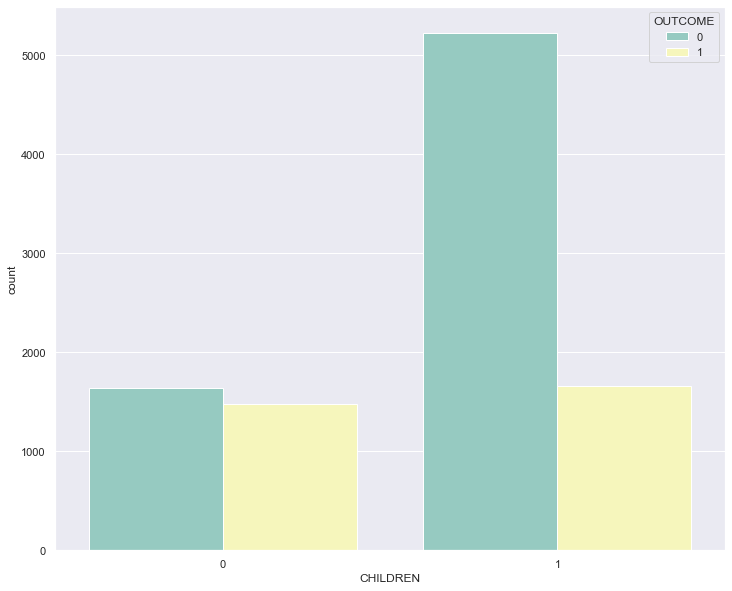

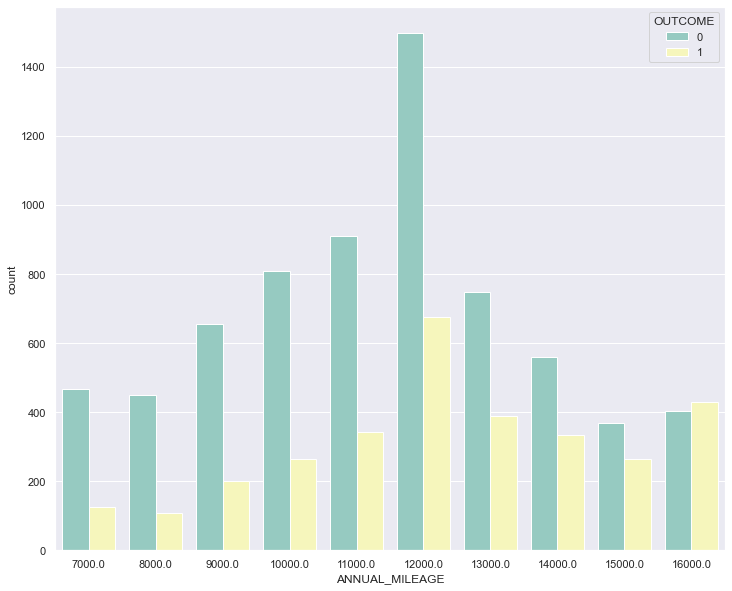

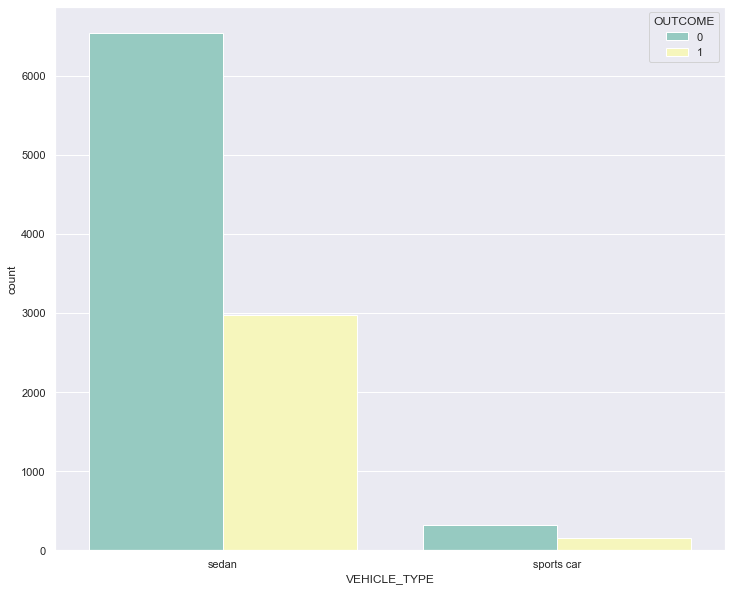

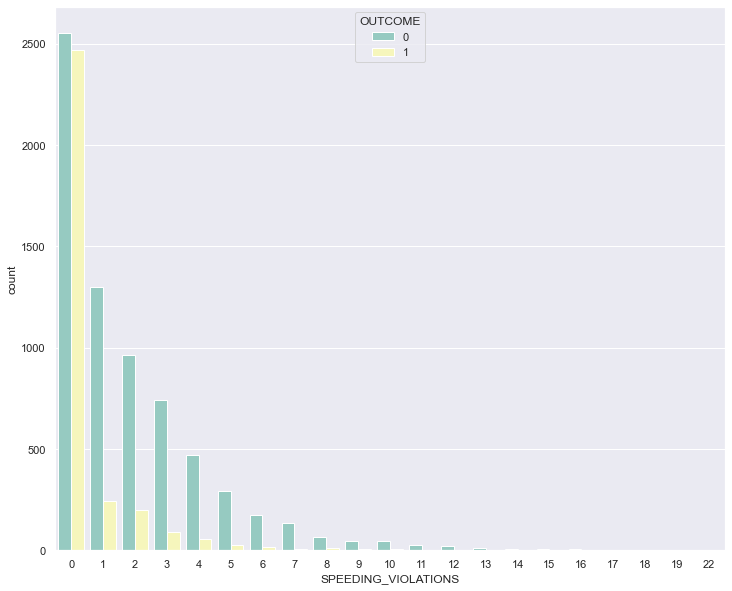

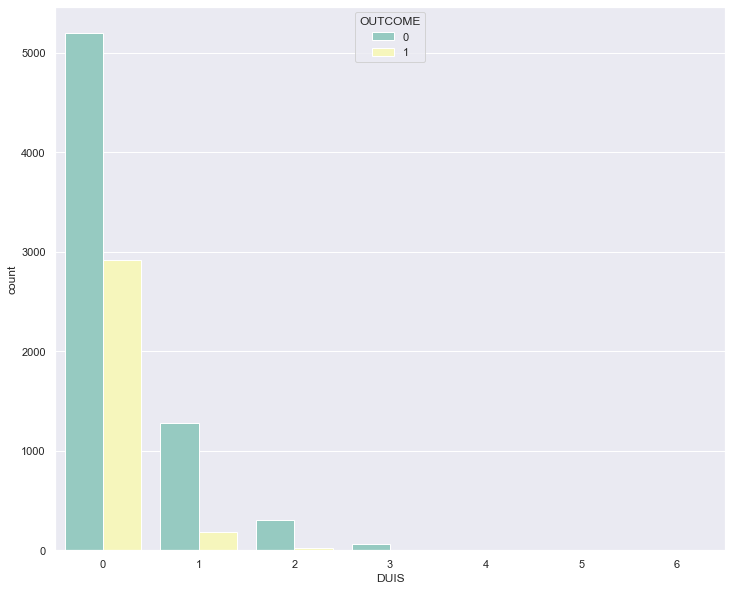

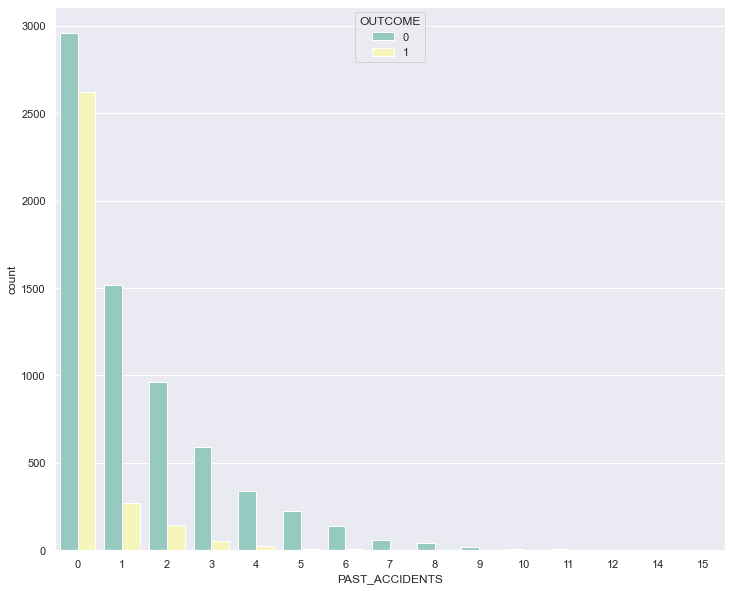

In [14]:
# Looping through all the features by our y variable - see if there is relationship

features = ['AGE', 'GENDER', 'RACE',
       'DRIVING_EXPERIENCE', 'EDUCATION',
       'INCOME', 'VEHICLE_OWNERSHIP','POSTAL_CODE',
       'VEHICLE_YEAR', 'VEHICLE_YEAR', 'CHILDREN','ANNUAL_MILEAGE','VEHICLE_TYPE','SPEEDING_VIOLATIONS','DUIS','PAST_ACCIDENTS']

for f in features:
    sns.countplot(x = f, data = raw_data, palette = 'Set3', hue = 'OUTCOME')
    plt.show()

<h2>PODSUMOWANIE<h2>

*Tak jak wczesniej zauważyła, najwięcej ludzi dostajacych odszkodowania(bede nazywala ich-tzw"jedynki"), jest mlodych lub w wieku srednim
    
*wiecej mezczyzn jest jedynkami
    
*jesli chodzi o rase moim zdaniem jest zbyt malo danych o mniejszoscicach narodowych by moc mowic o jakimss trendzie tu,
    
*doswiadczenie jet moimz daniem najbafdziej znaczacym czynnikiem ktory wplywa na to czy dostaniemy odszkodowanie. Osoby bardzo dowiadczone na drodze prawdopodobnie robia mniej wypadkow.
    
*osoby mniej wyksztlacone robia wiecej wypadkow
    
*jesli samochod jest stary to czesciej powoduje wypadki
    
*osoby z dziecmi jezdza bezpieczniej
    
*jesli chodzi o przebieg to trend rosnie do pewnego momentu-12.000km a pozniej maleje-moze to dlatego ze ludzie nie jezdza starszymi samochodami,moze czsciej stoja one juz w garazu?
    
*ossoby z wieloma przeszlymi wypadkami nie dostaja odszkodowania tak czesto-nic dziwnego bo firmy ubezpiueczeniowe patrza na to i im nie daja.
    
    

<h2>Tworzenie zmiennych kategorycznych(dummy variables)<h2>

In [15]:
features1 = ['AGE', 'GENDER', 'RACE',
       'DRIVING_EXPERIENCE', 'EDUCATION',
       'INCOME','POSTAL_CODE',
       'VEHICLE_YEAR', 'VEHICLE_YEAR','ANNUAL_MILEAGE','VEHICLE_TYPE','SPEEDING_VIOLATIONS','DUIS','PAST_ACCIDENTS']

In [16]:
pd.set_option('display.max_columns', None)

In [17]:
# przekształcanie zmiennych kategorycznych w reprezentację liczbową

new_raw_data1 = pd.get_dummies(raw_data, columns = features1)

# Notes:
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

print(raw_data.shape)
# print the shape
print(new_raw_data1.shape)

# Creating a new 0-1 y variable
#new_raw_data['Loan Approved2'] = 0
# Visualizing the data
new_raw_data1

(10000, 19)
(10000, 88)


,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,OUTCOME,AGE_Middle Age,AGE_Old,AGE_Very Old,AGE_Young,GENDER_female,GENDER_male,RACE_majority,RACE_minority,DRIVING_EXPERIENCE_Advanced,DRIVING_EXPERIENCE_Amateur,DRIVING_EXPERIENCE_Expert,DRIVING_EXPERIENCE_Newbie,EDUCATION_high school,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class,POSTAL_CODE_10238,POSTAL_CODE_21217,POSTAL_CODE_32765,POSTAL_CODE_92101,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015,ANNUAL_MILEAGE_7000.0,ANNUAL_MILEAGE_8000.0,ANNUAL_MILEAGE_9000.0,ANNUAL_MILEAGE_10000.0,ANNUAL_MILEAGE_11000.0,ANNUAL_MILEAGE_12000.0,ANNUAL_MILEAGE_13000.0,ANNUAL_MILEAGE_14000.0,ANNUAL_MILEAGE_15000.0,ANNUAL_MILEAGE_16000.0,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car,SPEEDING_VIOLATIONS_0,SPEEDING_VIOLATIONS_1,SPEEDING_VIOLATIONS_2,SPEEDING_VIOLATIONS_3,SPEEDING_VIOLATIONS_4,SPEEDING_VIOLATIONS_5,SPEEDING_VIOLATIONS_6,SPEEDING_VIOLATIONS_7,SPEEDING_VIOLATIONS_8,SPEEDING_VIOLATIONS_9,SPEEDING_VIOLATIONS_10,SPEEDING_VIOLATIONS_11,SPEEDING_VIOLATIONS_12,SPEEDING_VIOLATIONS_13,SPEEDING_VIOLATIONS_14,SPEEDING_VIOLATIONS_15,SPEEDING_VIOLATIONS_16,SPEEDING_VIOLATIONS_17,SPEEDING_VIOLATIONS_18,SPEEDING_VIOLATIONS_19,SPEEDING_VIOLATIONS_22,DUIS_0,DUIS_1,DUIS_2,DUIS_3,DUIS_4,DUIS_5,DUIS_6,PAST_ACCIDENTS_0,PAST_ACCIDENTS_1,PAST_ACCIDENTS_2,PAST_ACCIDENTS_3,PAST_ACCIDENTS_4,PAST_ACCIDENTS_5,PAST_ACCIDENTS_6,PAST_ACCIDENTS_7,PAST_ACCIDENTS_8,PAST_ACCIDENTS_9,PAST_ACCIDENTS_10,PAST_ACCIDENTS_11,PAST_ACCIDENTS_12,PAST_ACCIDENTS_14,PAST_ACCIDENTS_15
0,569520,0.629027,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,750365,0.357757,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,199901,0.493146,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,478866,0.206013,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,731664,0.388366,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,0.582787,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,910346,0.522231,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,468409,0.470940,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9998,903459,0.364185,0,0,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
new_raw_data = new_raw_data1.T.drop_duplicates().T
new_raw_data

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,OUTCOME,AGE_Middle Age,AGE_Old,AGE_Very Old,AGE_Young,GENDER_female,GENDER_male,RACE_majority,RACE_minority,DRIVING_EXPERIENCE_Advanced,DRIVING_EXPERIENCE_Amateur,DRIVING_EXPERIENCE_Expert,DRIVING_EXPERIENCE_Newbie,EDUCATION_high school,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class,POSTAL_CODE_10238,POSTAL_CODE_21217,POSTAL_CODE_32765,POSTAL_CODE_92101,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015,ANNUAL_MILEAGE_7000.0,ANNUAL_MILEAGE_8000.0,ANNUAL_MILEAGE_9000.0,ANNUAL_MILEAGE_10000.0,ANNUAL_MILEAGE_11000.0,ANNUAL_MILEAGE_12000.0,ANNUAL_MILEAGE_13000.0,ANNUAL_MILEAGE_14000.0,ANNUAL_MILEAGE_15000.0,ANNUAL_MILEAGE_16000.0,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car,SPEEDING_VIOLATIONS_0,SPEEDING_VIOLATIONS_1,SPEEDING_VIOLATIONS_2,SPEEDING_VIOLATIONS_3,SPEEDING_VIOLATIONS_4,SPEEDING_VIOLATIONS_5,SPEEDING_VIOLATIONS_6,SPEEDING_VIOLATIONS_7,SPEEDING_VIOLATIONS_8,SPEEDING_VIOLATIONS_9,SPEEDING_VIOLATIONS_10,SPEEDING_VIOLATIONS_11,SPEEDING_VIOLATIONS_12,SPEEDING_VIOLATIONS_13,SPEEDING_VIOLATIONS_14,SPEEDING_VIOLATIONS_15,SPEEDING_VIOLATIONS_16,SPEEDING_VIOLATIONS_17,SPEEDING_VIOLATIONS_18,SPEEDING_VIOLATIONS_19,SPEEDING_VIOLATIONS_22,DUIS_0,DUIS_1,DUIS_2,DUIS_3,DUIS_4,DUIS_5,DUIS_6,PAST_ACCIDENTS_0,PAST_ACCIDENTS_1,PAST_ACCIDENTS_2,PAST_ACCIDENTS_3,PAST_ACCIDENTS_4,PAST_ACCIDENTS_5,PAST_ACCIDENTS_6,PAST_ACCIDENTS_7,PAST_ACCIDENTS_8,PAST_ACCIDENTS_9,PAST_ACCIDENTS_10,PAST_ACCIDENTS_11,PAST_ACCIDENTS_12,PAST_ACCIDENTS_14,PAST_ACCIDENTS_15
0,569520.0,0.629027,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,750365.0,0.357757,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,199901.0,0.493146,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,478866.0,0.206013,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,731664.0,0.388366,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164.0,0.582787,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [22]:


#new_raw_data[new_raw_data.Feature != 'ID']

new_raw_data.drop('ID',
  axis='columns', inplace=True)

new_raw_data

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,OUTCOME,AGE_Middle Age,AGE_Old,AGE_Very Old,AGE_Young,GENDER_female,GENDER_male,RACE_majority,RACE_minority,DRIVING_EXPERIENCE_Advanced,DRIVING_EXPERIENCE_Amateur,DRIVING_EXPERIENCE_Expert,DRIVING_EXPERIENCE_Newbie,EDUCATION_high school,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class,POSTAL_CODE_10238,POSTAL_CODE_21217,POSTAL_CODE_32765,POSTAL_CODE_92101,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015,ANNUAL_MILEAGE_7000.0,ANNUAL_MILEAGE_8000.0,ANNUAL_MILEAGE_9000.0,ANNUAL_MILEAGE_10000.0,ANNUAL_MILEAGE_11000.0,ANNUAL_MILEAGE_12000.0,ANNUAL_MILEAGE_13000.0,ANNUAL_MILEAGE_14000.0,ANNUAL_MILEAGE_15000.0,ANNUAL_MILEAGE_16000.0,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car,SPEEDING_VIOLATIONS_0,SPEEDING_VIOLATIONS_1,SPEEDING_VIOLATIONS_2,SPEEDING_VIOLATIONS_3,SPEEDING_VIOLATIONS_4,SPEEDING_VIOLATIONS_5,SPEEDING_VIOLATIONS_6,SPEEDING_VIOLATIONS_7,SPEEDING_VIOLATIONS_8,SPEEDING_VIOLATIONS_9,SPEEDING_VIOLATIONS_10,SPEEDING_VIOLATIONS_11,SPEEDING_VIOLATIONS_12,SPEEDING_VIOLATIONS_13,SPEEDING_VIOLATIONS_14,SPEEDING_VIOLATIONS_15,SPEEDING_VIOLATIONS_16,SPEEDING_VIOLATIONS_17,SPEEDING_VIOLATIONS_18,SPEEDING_VIOLATIONS_19,SPEEDING_VIOLATIONS_22,DUIS_0,DUIS_1,DUIS_2,DUIS_3,DUIS_4,DUIS_5,DUIS_6,PAST_ACCIDENTS_0,PAST_ACCIDENTS_1,PAST_ACCIDENTS_2,PAST_ACCIDENTS_3,PAST_ACCIDENTS_4,PAST_ACCIDENTS_5,PAST_ACCIDENTS_6,PAST_ACCIDENTS_7,PAST_ACCIDENTS_8,PAST_ACCIDENTS_9,PAST_ACCIDENTS_10,PAST_ACCIDENTS_11,PAST_ACCIDENTS_12,PAST_ACCIDENTS_14,PAST_ACCIDENTS_15
0,0.629027,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.357757,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.493146,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.206013,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.388366,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.582787,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9

<h2>Standaryzacja danych<h2>

UWAGAAA:
Nie musimy normalizować / standaryzować danych w regresji logistycznej ze względu na funkcję logistyczną (0 lub 1).!!!!!

<h2>Wybór zmiennych do modelu<h2>

W tym przykładzie nie mamy wielu zmiennych, więc możemy wykorzystać wszystkie dane tak naprawdę, ale w niektórych przypadkach mamy tysiące zmiennych i trzeba będzie je przefiltrować, aby zaoszczędzić czas obliczeń.

Niemniej jednak warto dowiedzieć się, które zmienne u nas mają najwiękzy wpływ na mozliwośc dostania odszkodowania.

<h3>Etapy<h3>

*Podzielenie danych na X i y

*Uruchomienie estymatorów, opartych na drzewach (np. drzewa decyzyjne i lasy losowe).

*Wyliczenie ważności cech

In [23]:
# Podziel dane na X i y

X = new_raw_data.drop('OUTCOME', axis = 1).values #eliminujemy zmienna y po prostu tu 
y = new_raw_data['OUTCOME']

y = y.astype(int)

print(X.shape)
print(y.shape)

(10000, 84)
(10000,)


In [24]:
# Uruchamianie estymatorów opartych na drzewach (np. drzewa decyzyjne i lasy losowe).

dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

#nie bede zajmowala sie tu omawianiem drzew decyzyjnych,przygotuje na to oddzielnego notebooka :)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

Uwaga:
Znaczenie cechy oblicza się jako (znormalizowaną) całkowitą redukcję entropii (także innych kryteriów) spowodowaną przez tę cechę lub większy zysk informacyjny.

Entropię krótko omawiałam i używałam w notebooku o święcie kukurydzy.

In [25]:
# Uruchamianie mierzalnika waznosci cech

fi_col = []
fi = []

for i,column in enumerate(new_raw_data.drop('OUTCOME', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for CREDIT_SCORE is : 0.0828617947335682
The feature importance for VEHICLE_OWNERSHIP is : 0.1356196764086446
The feature importance for MARRIED is : 0.015778625611117834
The feature importance for CHILDREN is : 0.011662660923248002
The feature importance for AGE_Middle Age is : 0.002788621644156674
The feature importance for AGE_Old is : 0.005555573578520406
The feature importance for AGE_Very Old is : 0.0014994139693570911
The feature importance for AGE_Young is : 0.003057113724779472
The feature importance for GENDER_female is : 0.010622091233312612
The feature importance for GENDER_male is : 0.024667442522915497
The feature importance for RACE_majority is : 0.00048678279000624364
The feature importance for RACE_minority is : 0.002400996683556672
The feature importance for DRIVING_EXPERIENCE_Advanced is : 0.0007331399337174125
The feature importance for DRIVING_EXPERIENCE_Amateur is : 0.07483954157765792
The feature importance for DRIVING_EXPERIENCE_Expert is 

<h2>Uzeregowanie od najwazniejszego do najmniej waznego <h2>

In [26]:
pd.set_option('display.max_rows', None)

In [27]:
# Tworzenie dataframu
fi_col
fi

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])
fi_df


# Ordering the data
fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

# Creating columns to keep
columns_to_keep = fi_df['Feature'][0:59]

columns_to_keep1 = new_raw_data.drop('OUTCOME', axis = 1).values

fi_df

,index,Feature,Feature Importance
0,15,DRIVING_EXPERIENCE_Newbie,0.326039
1,1,VEHICLE_OWNERSHIP,0.135620
2,0,CREDIT_SCORE,0.082862
3,13,DRIVING_EXPERIENCE_Amateur,0.074840
4,27,VEHICLE_YEAR_after 2015,0.051771
5,24,POSTAL_CODE_21217,0.051705
6,23,POSTAL_CODE_10238,0.048082
7,28,VEHICLE_YEAR_before 2015,0.037763
8,9,GENDER_male,0.024667
9,2,MARRIED,0.015779


In [28]:
columns_to_keep1

array([[0.629027, 1.000000, 0.000000, ..., 0.000000, 0.000000, 0.000000],
       [0.357757, 0.000000, 0.000000, ..., 0.000000, 0.000000, 0.000000],
       [0.493146, 1.000000, 0.000000, ..., 0.000000, 0.000000, 0.000000],
       ...,
       [0.470940, 1.000000, 0.000000, ..., 0.000000, 0.000000, 0.000000],
       [0.364185, 0.000000, 0.000000, ..., 0.000000, 0.000000, 0.000000],
       [0.435225, 1.000000, 1.000000, ..., 0.000000, 0.000000, 0.000000]])

UWAGI:
    
*Proszę zauważyć, że nie normalizowaliśmy/skalowaliśmy naszych danych

*Proszę zauważyć, że nie przeprowadziliśmy żadnej inżynierii cech - nie stworzyliśmy nowych cech

<h2>6. Podział danych surowych - walidacja <h2>

In [30]:
# Podziel dane na X i y jescze raz po wyodrebnieniu kolumn ktore sie nadaja

X = new_raw_data[columns_to_keep].values
X

y = new_raw_data['OUTCOME']
y = y.astype(int)
y

print(X.shape)
print(y.shape)

(10000, 59)
(10000,)


In [31]:
# Walidacja-podział na dane treningowe,testowe i walidacyjne

# pierwszy podzial
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

# drugi podzial
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(7200, 59)
(2000, 59)
(800, 59)
(7200,)
(2000,)
(800,)


*Zbior treningowy-zbiór treningowy to największy korpus zbioru danych, który jest przeznaczony do trenowania modelu. 

*Zbior walidacyjny-Zbiór walidacyjny to oddzielna część zbioru danych, która jest używana podczas treningu, aby zorientować się, jak dobrze model radzi sobie na obrazach, które nie są używane w treningu.

*zbior testowy-Po zakończeniu wszystkich eksperymentów szkoleniowych można prawdopodobnie zorientować się, jak model poradzi sobie na zbiorze walidacyjnym. Należy jednak pamiętać, że metryki zbioru walidacyjnego mogły mieć wpływ na użytkownika podczas tworzenia modelu i w tym sensie projektant mógł zbytnio dopasować nowy model do zbioru walidacyjnego.

Ponieważ zbiór walidacyjny jest w dużym stopniu wykorzystywany podczas tworzenia modelu, ważne jest, aby zachować zupełnie odrębną twierdzę danych - zbiór testowy. Na samym końcu projektu można uruchomić metrykę ewaluacyjną na zbiorze testowym, aby zorientować się, jak dobrze model sprawdzi się w warunkach produkcyjnych.



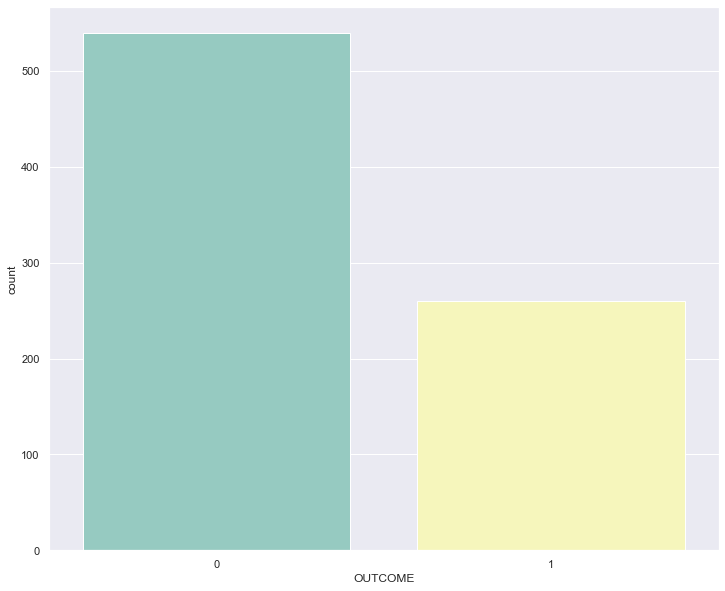

In [32]:
# Investigating the distr of all ys

ax = sns.countplot(x = y_valid, palette = "Set3")

<h2>Czym jest regresja logistyczna?<h2>

Jest to znana metoda statystyczna, służąca do przewidywania dwóch lub więcej klas binarnych.

Dlatego regresja logistyczna jest stosowana w przypadku problemów z klasyfikacją.
Aby regresja logistyczna działała, przekształcamy naszą linię regresji liniowej w krzywą regresji logistycznej, dzięki czemu uzyskujemy dobre dopasowanie do naszych danych (zob. rysunek poniżej)


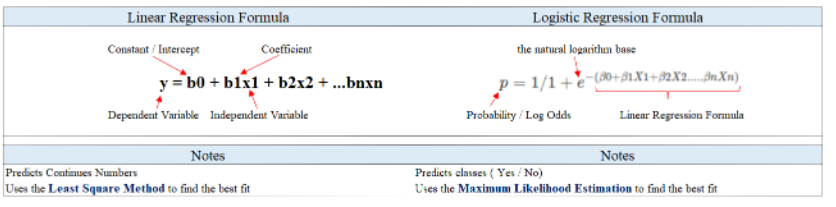

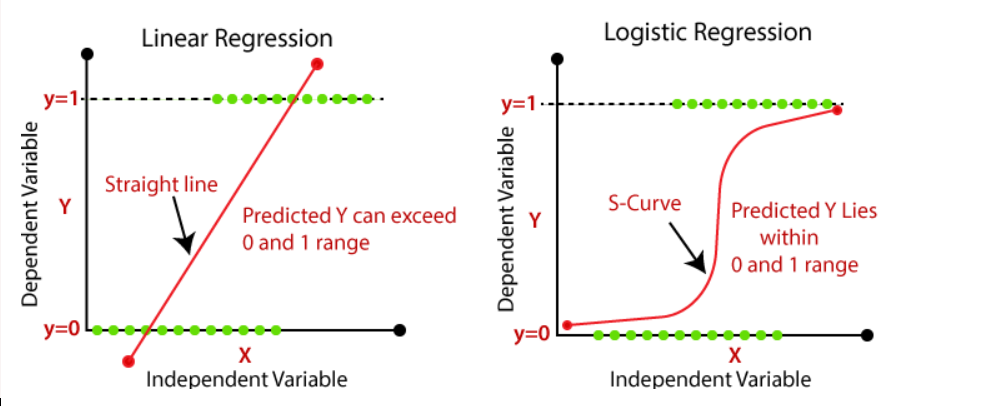

<h2>Jak działa regresja logoistyczna? <h2>


Regresja logistyczna to metoda analizy statystycznej służąca do przewidywania wyniku binarnego, takiego jak "tak" lub "nie", na podstawie wcześniejszych obserwacji zbioru danych.

Model regresji logistycznej pozwala przewidzieć zależną zmienną danych poprzez analizę związku między jedną lub kilkoma istniejącymi zmiennymi niezależnymi. Na przykład regresja logistyczna może być stosowana do przewidywania, czy kandydat na polityka wygra czy przegra wybory lub czy uczeń szkoły średniej zostanie przyjęty na określoną uczelnię, czy też nie. Takie wyniki binarne pozwalają na podjęcie bezpośredniej decyzji między dwiema alternatywami.

<h2>Funkcja sigmoidalna-tzw."S"<h2>

Aby odwzorować przewidywane wartości na prawdopodobieństwa, używamy funkcji sigmoidalnej. Funkcja ta mapuje dowolną wartość rzeczywistą na inną wartość z przedziału od 0 do 1. W uczeniu maszynowym używamy jej do mapowania przewidywań na prawdopodobieństwa.

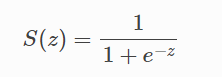

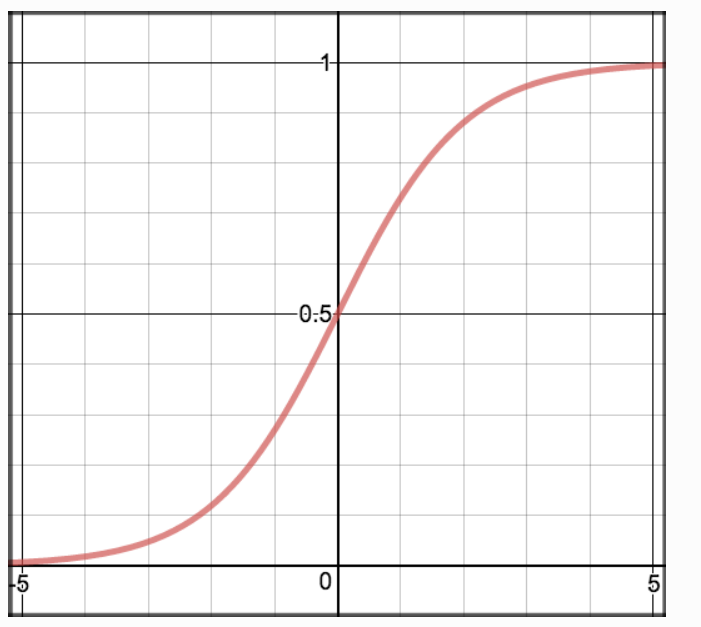

<h2>Granica decyzji<h2>

Nasza obecna funkcja predykcji zwraca wynik prawdopodobieństwa z przedziału od 0 do 1. Aby odwzorować to na klasę dyskretną (prawda/fałsz, kot/pies), wybieramy wartość progową lub punkt krytyczny, powyżej którego będziemy klasyfikować wartości do klasy 1, a poniżej którego będziemy klasyfikować wartości do klasy 2.

Na przykład, jeśli nasz próg wynosi 0,5, a nasza funkcja predykcji zwraca 0,7, klasyfikujemy tę obserwację jako pozytywną. Jeśli nasza prognoza wyniosła 0,2, zaklasyfikowalibyśmy obserwację jako negatywną. W przypadku regresji logistycznej z wieloma klasami można wybrać klasę o najwyższym przewidywanym prawdopodobieństwie.

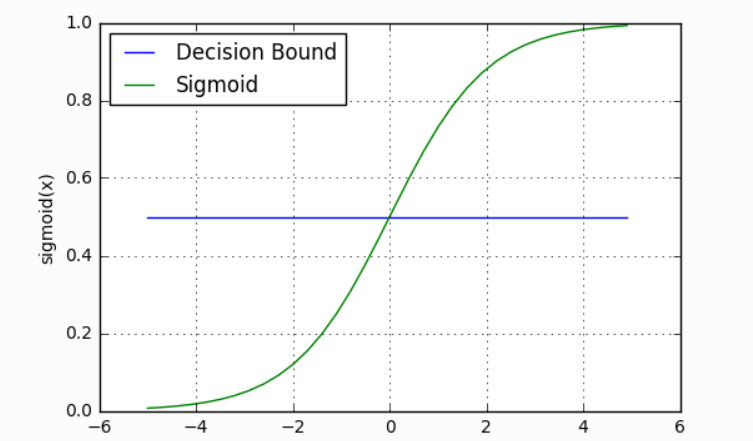

<h2>Tworzenie przewidywań<h2>

Korzystając z naszej wiedzy o funkcjach sigmoidalnych i granicach decyzyjnych, możemy teraz napisać funkcję predykcji(tu zrobi to za nas pyton i bibliotek sklearn:)). Funkcja predykcji w regresji logistycznej zwraca prawdopodobieństwo, że nasza obserwacja jest pozytywna, prawdziwa lub "Tak". Nazywamy to klasą 1, a jej notacja to P(class=1). Gdy prawdopodobieństwo zbliża się do 1, nasz model jest bardziej pewny, że obserwacja należy do klasy 1.

<h2>Czemu mu wykorzytamy tu regresje logisstyczna?<h2>

Modele regresji zasadniczo reprezentują lub zawierają równanie matematyczne, które przybliża interakcje pomiędzy różnymi zmiennymi poddawanymi modelowaniu. Modele uczenia maszynowego wykorzystują i trenują na kombinacji danych wejściowych i wyjściowych oraz wykorzystują nowe dane do przewidywania danych wyjściowych.

https://www.youtube.com/watch?v=yIYKR4sgzI8 -naprawde ssuper filmik o regresji

<h2>Zapuszczenie regresji logistycznej w programie<h2>

Solver
-Algorytm do użycia w problemie optymalizacji. Domyślnie jest to 'lbfgs'. Przy wyborze solvera warto wziąć pod uwagę następujące aspekty:

W przypadku małych zbiorów danych dobrym wyborem jest 'liblinear', natomiast 'sag' i 'saga' są szybsze w przypadku dużych zbiorów;

W przypadku problemów wieloklasowych tylko 'newton-cg', 'sag', 'saga' i 'lbfgs' obsługują stratę wielomianową;

liblinear" jest ograniczony do schematów "jeden kontra reszta".

Random atate
-Jest to przydatne, jeśli chcesz uzyskać powtarzalne wyniki, na przykład w dokumentacji, tak aby każdy mógł zobaczyć te same liczby podczas uruchamiania przykładów. W praktyce należy ustawić random_state na jakąś stałą liczbę podczas testowania, a następnie usunąć ją podczas produkcji, jeśli naprawdę potrzebny jest losowy (a nie stały) podział.



In [36]:
# Trenowanie modelu

log_reg = LogisticRegression(random_state=1000, solver = 'lbfgs',max_iter=1000)

log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1000)

In [37]:
# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

# score- Returns the mean accuracy on the given test data and labels - below

array([[2.592468, -1.965220, 0.048426, 0.711635, -0.989812, 4.978384,
        -2.518824, 0.988344, 0.539981, -0.367496, -0.209561, -0.541449,
        -0.032143, 0.601236, -0.060062, -0.021295, 0.029449, 0.237898,
        0.102741, 0.016107, -0.200310, 0.193459, 0.339671, -0.263174,
        -0.098008, -0.119489, -0.076592, -0.312615, 0.081997, 0.112364,
        0.005717, -0.077093, -0.281396, 0.324386, 0.003720, -0.054692,
        -1.438556, -0.266029, -0.486798, 0.027784, 0.437047, -0.007185,
        -1.936251, 0.047291, -0.066188, -0.410825, -1.022471, -0.218102,
        0.025222, 0.375517, -0.145836, -1.369320, 0.436876, 0.368842,
        0.043446, 0.053224, 0.373239, -0.496565, -0.100327]])

In [38]:
# Accuracy - Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Accuracy - Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))


# Raport klasyfikacyjny
print(classification_report(y_train, y_pred))

The Training Accuracy is:  0.8544444444444445
The Testing Accuracy is:  0.8545
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4922
           1       0.78      0.74      0.76      2278

    accuracy                           0.85      7200
   macro avg       0.83      0.82      0.83      7200
weighted avg       0.85      0.85      0.85      7200



In [39]:
#Macierz konfuzji

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

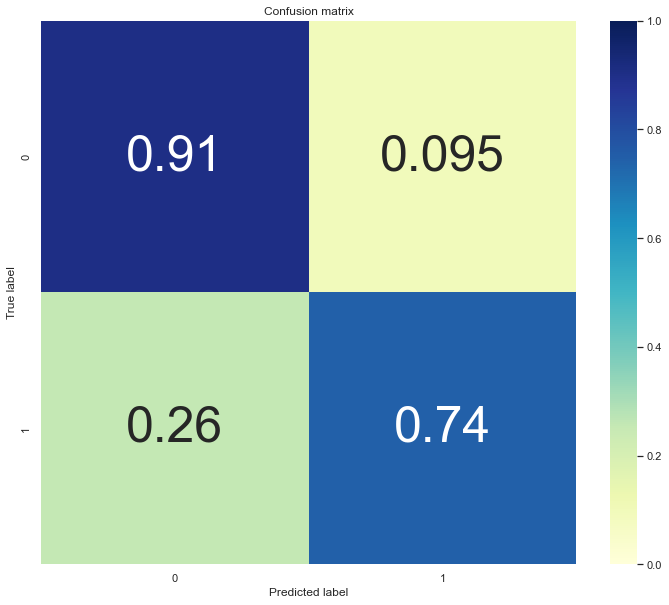

In [40]:
# Wizualizacja macierzy konfuzji-zeby ładniej było widać 

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [41]:
log_reg.classes_

array([0, 1])

In [42]:
cm.sum(axis=1)
cm_norm

array([[0.905323, 0.094677],
       [0.255487, 0.744513]])

In [43]:
cm

array([[4456,  466],
       [ 582, 1696]], dtype=int64)

In [44]:
cm.sum(axis=0)

array([5038, 2162], dtype=int64)

In [45]:
np.diag(cm)

array([4456, 1696], dtype=int64)

In [46]:
# Obliczanie wyników fałszywie pozytywnych (FP), fałszywie negatywnych (FN), prawdziwie pozytywnych (TP) i prawdziwie negatywnych (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate-nie tlumacze to oryginalne nazwy
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value-Precyzja
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

The True Positive Rate is: [0.905323 0.744513]
The Precision is: [0.884478 0.784459]
The False positive rate is: [0.255487 0.094677]
The False Negative Rate is:  [0.094677 0.255487]

The average TPR is: 0.8249178849400962
The average Precision is: 0.8344684009299903
The average False positive rate is: 0.17508211505990376
The average False Negative Rate is: 0.17508211505990376


<h2>Strata logarytmiczna  lub strata entropii<h2>

In [126]:
# Running Log loss on training
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba))

# Running Log loss on testing
pred_proba_t = log_reg.predict_proba(X_test)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_proba_t))

The Log Loss on Training is:  0.63889162529794
The Log Loss on Testing Dataset is:  0.6325750299206028


Jest to funkcja straty używana w (wielomianowej) regresji logistycznej i jej rozszerzeniach, takich jak sieci neuronowe, definiowana jako ujemne logarytmiczne prawdopodobieństwo prawdziwych etykiet na podstawie przewidywań klasyfikatora probabilistycznego.

Dlaczego jest to ważne? Na przykład, wyobraźmy sobie, że mamy 2 modele/klasyfikatory, które poprawnie przewidują jedną obserwację (np. u nas dostanie odszkodowania). Jednak 1 klasyfikator ma przewidywane prawdopodobieństwo 0,54, a drugi 0,95. Który z nich wybierzesz? Dokładność klasyfikacji nie pomoże w tym przypadku, ponieważ oba będą miały 100%.
Musimy zawze wybierac model z mniejsza stratą logarytmiczną.

<h2>Tuning Hyperparametrów<h2>

In [49]:
np.geomspace(1e-5, 1e5, num=20)

array([0.000010, 0.000034, 0.000113, 0.000379, 0.001274, 0.004281,
       0.014384, 0.048329, 0.162378, 0.545559, 1.832981, 6.158482,
       20.691381, 69.519280, 233.572147, 784.759970, 2636.650899,
       8858.667904, 29763.514416, 100000.000000])

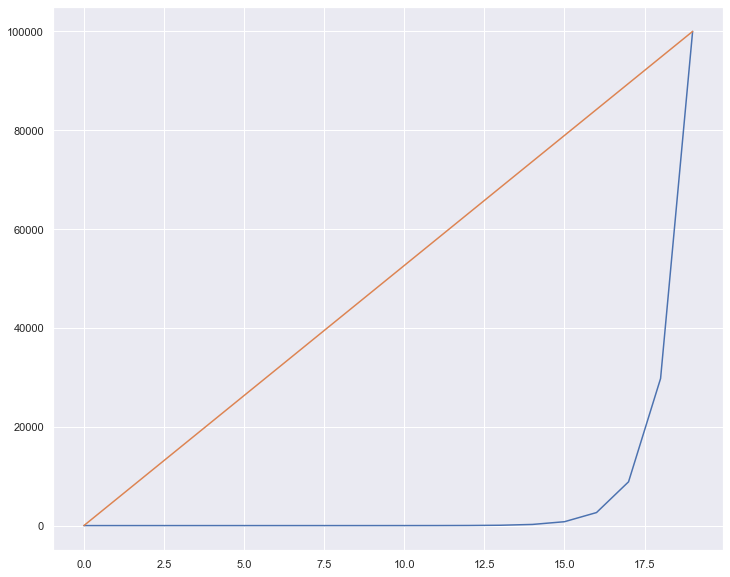

In [50]:
# Creating a range for C values
np.geomspace(1e-5, 1e5, num=20)

# ploting it
plt.plot(np.geomspace(1e-5, 1e5, num=20)) #  uniformly distributed in log space
plt.plot(np.linspace(1e-5, 1e5, num=20)) # uniformly distributed in linear space, instead of log space
# plt.plot(np.logspace(np.log10(1e-5) , np.log10(1e5) , num=20)) # same as geomspace

In [51]:
# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")

The CA of C parameter 1e-05 is 0.7025:
The Logg Loss of C parameter 1e-05 is 0.6036575577842614:

The CA of C parameter 3.359818286283781e-05 is 0.7025:
The Logg Loss of C parameter 3.359818286283781e-05 is 0.5907824038888067:

The CA of C parameter 0.00011288378916846884 is 0.7025:
The Logg Loss of C parameter 0.00011288378916846884 is 0.5562474525058304:

The CA of C parameter 0.000379269019073225 is 0.76:
The Logg Loss of C parameter 0.000379269019073225 is 0.49247584244029713:

The CA of C parameter 0.0012742749857031334 is 0.82:
The Logg Loss of C parameter 0.0012742749857031334 is 0.4256230583158725:

The CA of C parameter 0.004281332398719391 is 0.837:
The Logg Loss of C parameter 0.004281332398719391 is 0.38034074270851026:

The CA of C parameter 0.01438449888287663 is 0.847:
The Logg Loss of C parameter 0.01438449888287663 is 0.35462196860016215:

The CA of C parameter 0.04832930238571752 is 0.8525:
The Logg Loss of C parameter 0.04832930238571752 is 0.3404979845393919:

The C

C:\Users\weron\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\weron\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

The CA of C parameter 1.8329807108324339 is 0.854:
The Logg Loss of C parameter 1.8329807108324339 is 0.33083502306750895:

The CA of C parameter 6.1584821106602545 is 0.854:
The Logg Loss of C parameter 6.1584821106602545 is 0.33063184234853704:

The CA of C parameter 20.6913808111479 is 0.854:
The Logg Loss of C parameter 20.6913808111479 is 0.33045993531298834:



C:\Users\weron\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\weron\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

The CA of C parameter 69.51927961775606 is 0.8545:
The Logg Loss of C parameter 69.51927961775606 is 0.3305056563769058:

The CA of C parameter 233.57214690901213 is 0.8545:
The Logg Loss of C parameter 233.57214690901213 is 0.3305068635156039:

The CA of C parameter 784.7599703514607 is 0.8545:
The Logg Loss of C parameter 784.7599703514607 is 0.3305201182648002:



C:\Users\weron\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\weron\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

The CA of C parameter 2636.6508987303555 is 0.8545:
The Logg Loss of C parameter 2636.6508987303555 is 0.3304841864040145:

The CA of C parameter 8858.667904100832 is 0.854:
The Logg Loss of C parameter 8858.667904100832 is 0.33051459472617967:

The CA of C parameter 29763.51441631313 is 0.8545:
The Logg Loss of C parameter 29763.51441631313 is 0.33048270094912535:

The CA of C parameter 100000.0 is 0.855:
The Logg Loss of C parameter 100000.0 is 0.3305251992479443:



C:\Users\weron\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\weron\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [52]:
# putting the outcomes in a Table

# reshaping
CA2 = np.array(CA).reshape(20,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(20,)

# zip
outcomes = zip(C_List, CA2, Logarithmic_Loss2)

#df
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'CA2','Logarithmic_Loss2'])

#print
df_outcomes

# Ordering the data (sort_values)
df_outcomes.sort_values("Logarithmic_Loss2", ascending = True).reset_index()

,index,C_List,CA2,Logarithmic_Loss2
0,12,20.691381,0.8540,0.330460
1,18,29763.514416,0.8545,0.330483
2,16,2636.650899,0.8545,0.330484
3,13,69.519280,0.8545,0.330506
4,14,233.572147,0.8545,0.330507
5,17,8858.667904,0.8540,0.330515
6,15,784.759970,0.8545,0.330520
7,19,100000.000000,0.8550,0.330525
8,11,6.158482,0.8540,0.330632
9,10,1.832981,0.8540,0.330835


In [53]:
#Another way of doing the above
# Scikit-learn offers a LogisticRegressionCV module which implements Logistic Regression 
# with builtin cross-validation to find out the optimal C parameter

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg CV
Log_reg3 = LogisticRegressionCV(random_state=15, Cs = C_List, solver ='lbfgs')
Log_reg3.fit(X_train, y_train)
print("The CA is:", Log_reg3.score(X_test, y_test))
pred_proba_t = Log_reg3.predict_proba(X_test)
log_loss3 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss3)

print("The optimal C parameter is: ", Log_reg3.C_)


C:\Users\weron\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\weron\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

The CA is: 0.854
The Logistic Loss is:  0.3306135285807279
The optimal C parameter is:  [6.158482]


<h2>K-krotna walidacja krzyżowa<h2>


Zaleta: K-krotna walidacja krzyżowa wykorzystuje wszystkie dane treningowe do trenowania modelu, stosując k różnych podziałów; powtarzane podziały trening-test są zbieżne do prawdziwej dokładności, jeśli dane treningowe są reprezentatywne dla rozkładu bazowego; w praktyce jest to jednak często zbyt optymistyczne. Wady: Wadą tej metody jest to, że algorytm treningowy musi być powtórzony od początku k razy, co oznacza, że potrzeba k razy więcej obliczeń, aby uzyskać ocenę. Ponadto, jeśli chcemy sprawdzić działanie algorytmu na zupełnie nowym zbiorze danych, którego algorytm nigdy nie widział, nie można tego zrobić za pomocą walidacji krzyżowej k-krotnej.

The CA of C parameter 1e-05 is 0.7025:
The Logg Loss of C parameter 1e-05 is 0.6036575577842614:



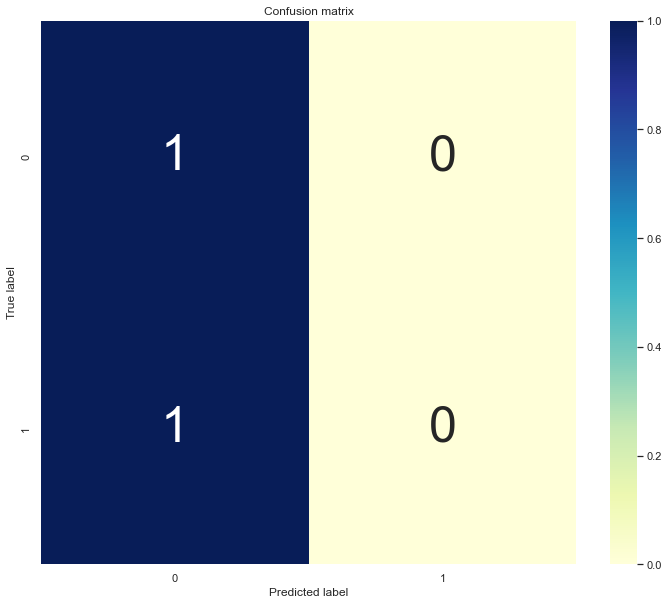

The CA of C parameter 3.359818286283781e-05 is 0.7025:
The Logg Loss of C parameter 3.359818286283781e-05 is 0.5907824038888067:



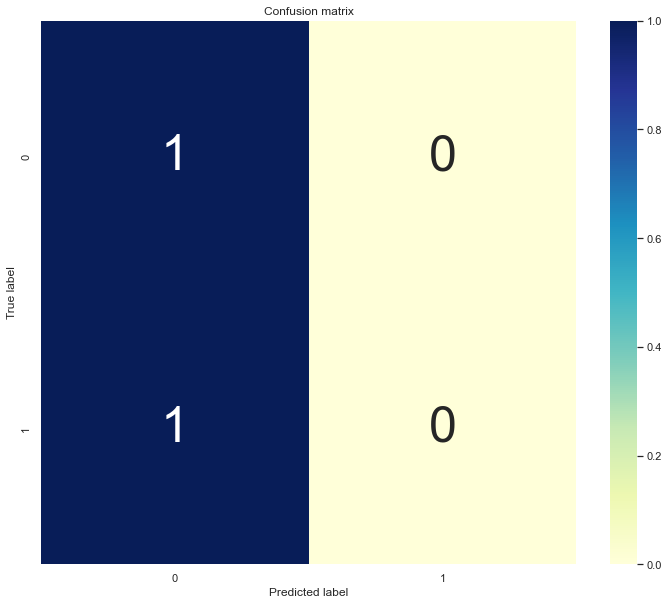

The CA of C parameter 0.00011288378916846884 is 0.7025:
The Logg Loss of C parameter 0.00011288378916846884 is 0.5562474525058304:



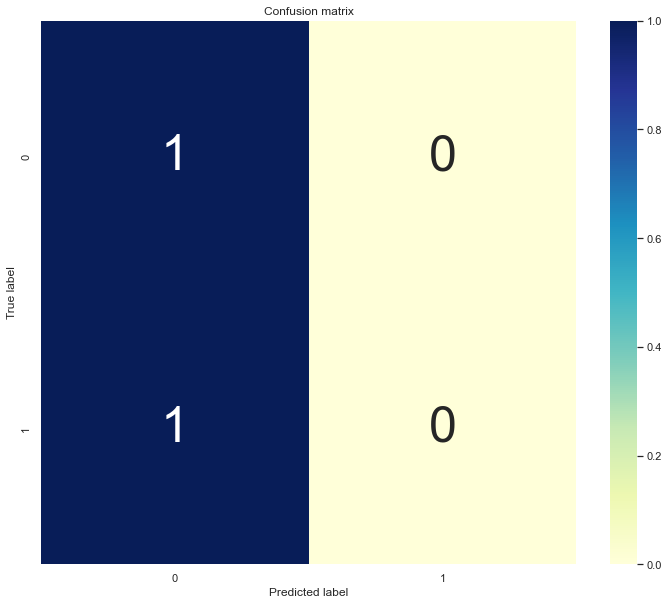

The CA of C parameter 0.000379269019073225 is 0.76:
The Logg Loss of C parameter 0.000379269019073225 is 0.49247584244029713:



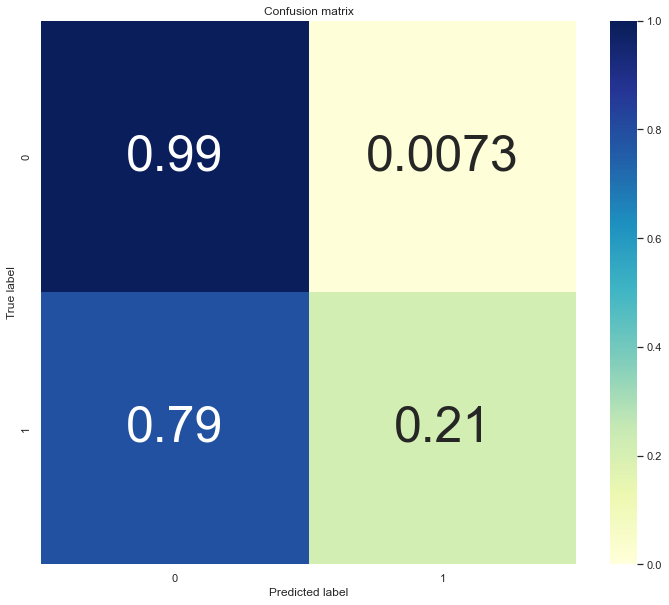

The CA of C parameter 0.0012742749857031334 is 0.82:
The Logg Loss of C parameter 0.0012742749857031334 is 0.4256230583158725:



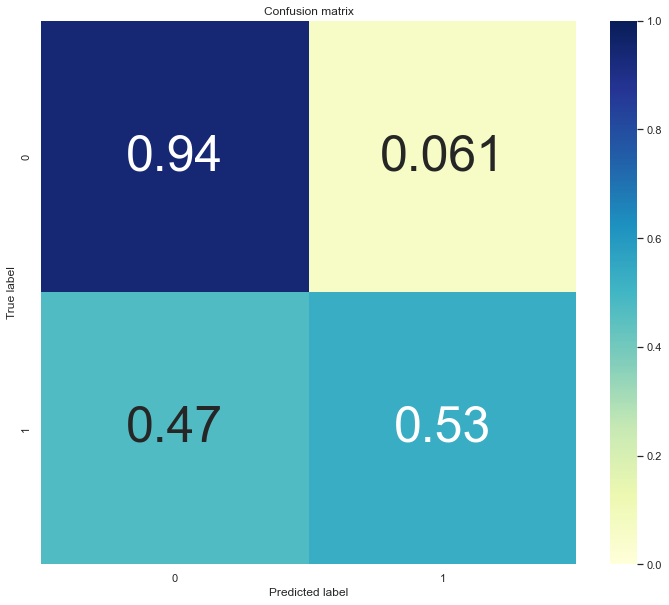

The CA of C parameter 0.004281332398719391 is 0.837:
The Logg Loss of C parameter 0.004281332398719391 is 0.38034074270851026:



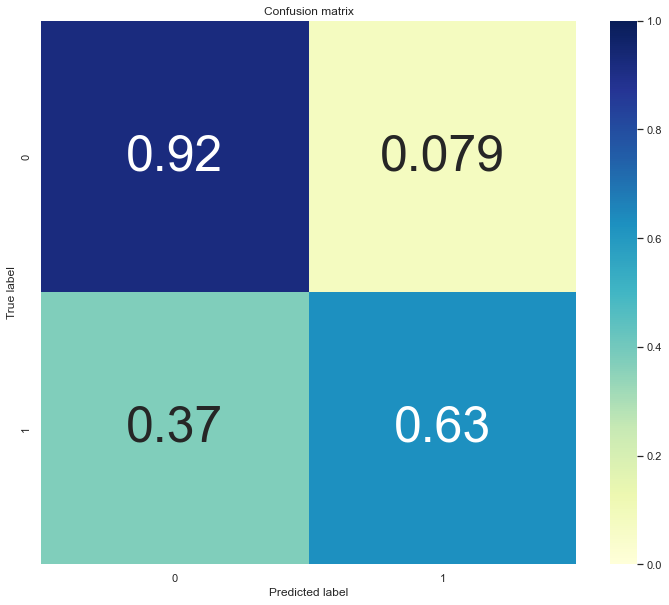

The CA of C parameter 0.01438449888287663 is 0.847:
The Logg Loss of C parameter 0.01438449888287663 is 0.35462196860016215:



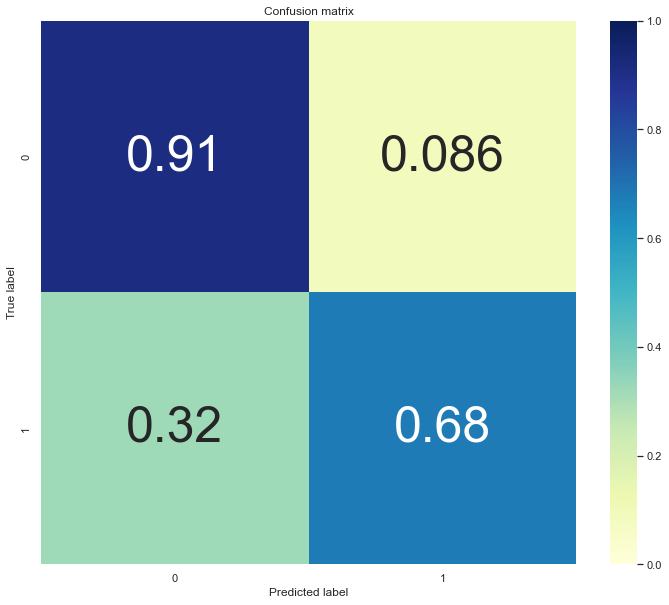

The CA of C parameter 0.04832930238571752 is 0.8525:
The Logg Loss of C parameter 0.04832930238571752 is 0.3404979845393919:



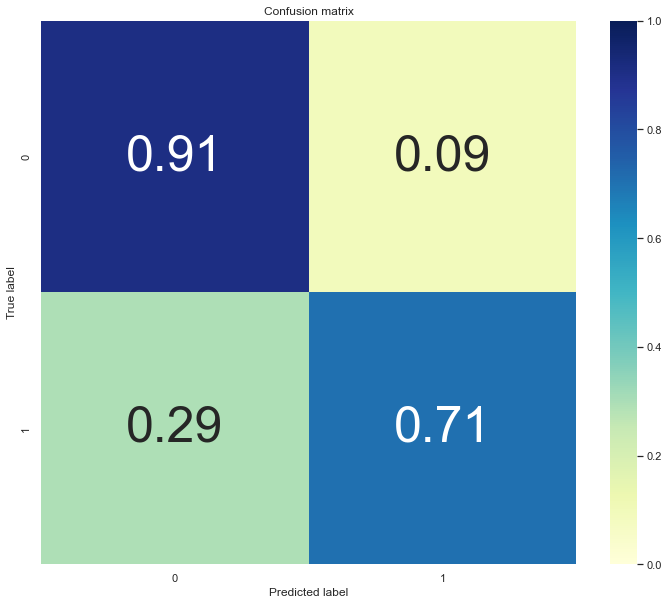

The CA of C parameter 0.1623776739188721 is 0.853:
The Logg Loss of C parameter 0.1623776739188721 is 0.3336775049280811:



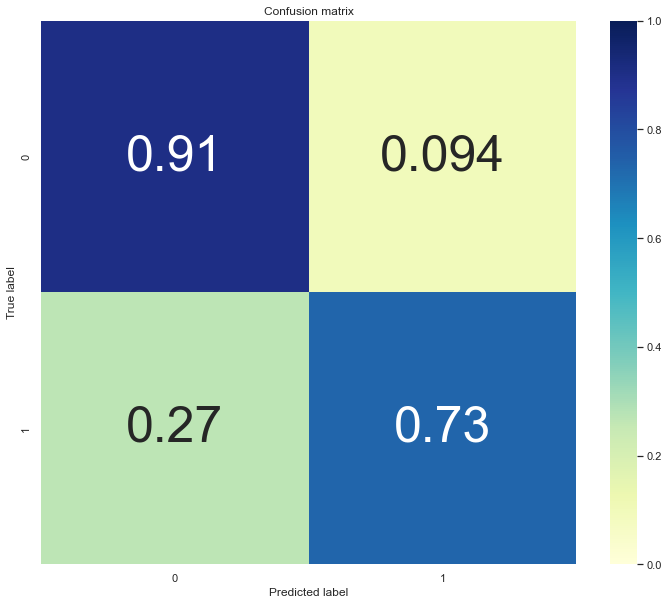

C:\Users\weron\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 0.5455594781168515 is 0.8535:
The Logg Loss of C parameter 0.5455594781168515 is 0.33136920627113897:



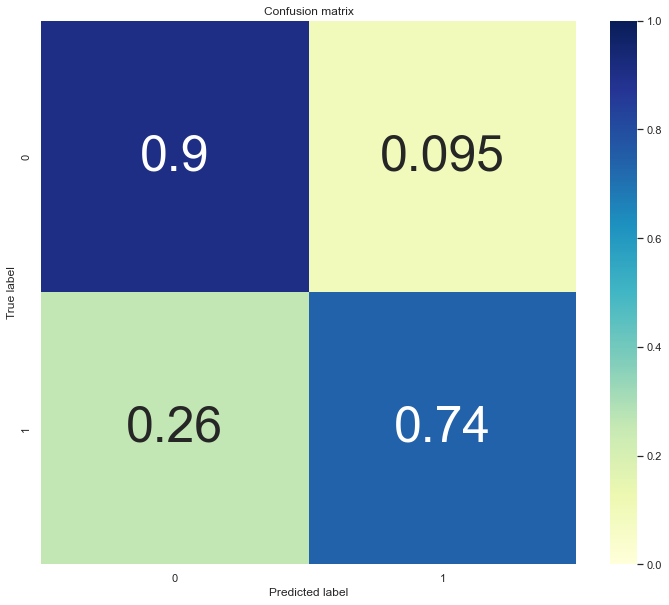

C:\Users\weron\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 1.8329807108324339 is 0.854:
The Logg Loss of C parameter 1.8329807108324339 is 0.33083502306750895:



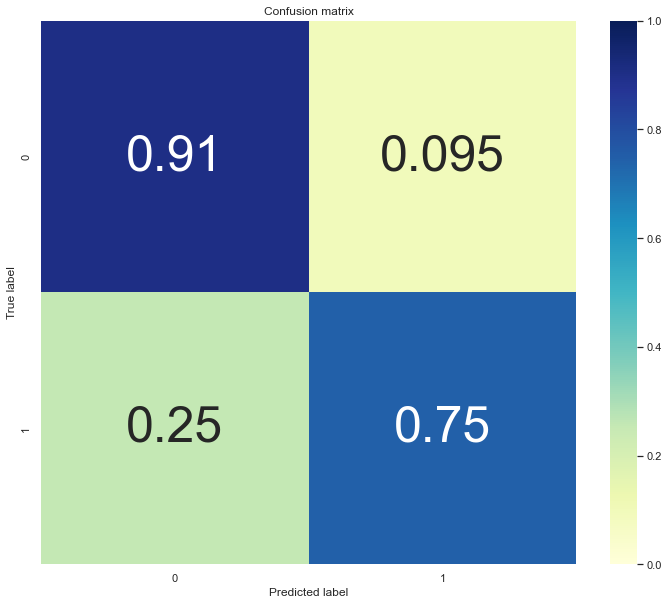

The CA of C parameter 6.1584821106602545 is 0.854:
The Logg Loss of C parameter 6.1584821106602545 is 0.33063184234853704:



C:\Users\weron\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


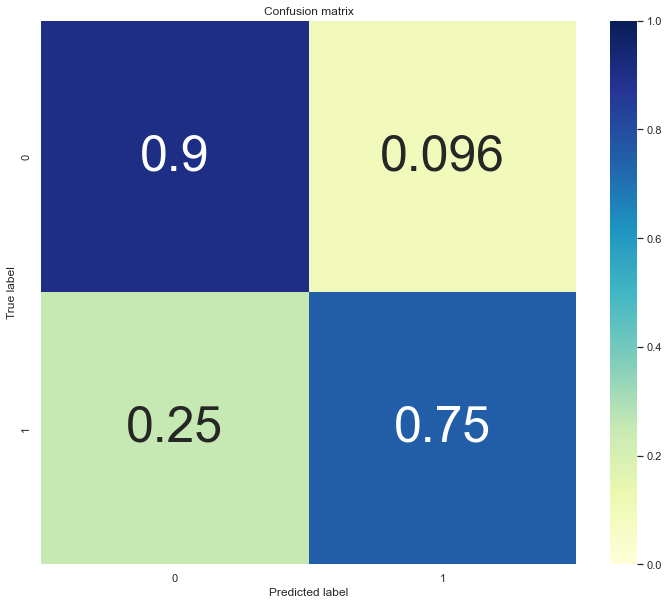

C:\Users\weron\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 20.6913808111479 is 0.854:
The Logg Loss of C parameter 20.6913808111479 is 0.33045993531298834:



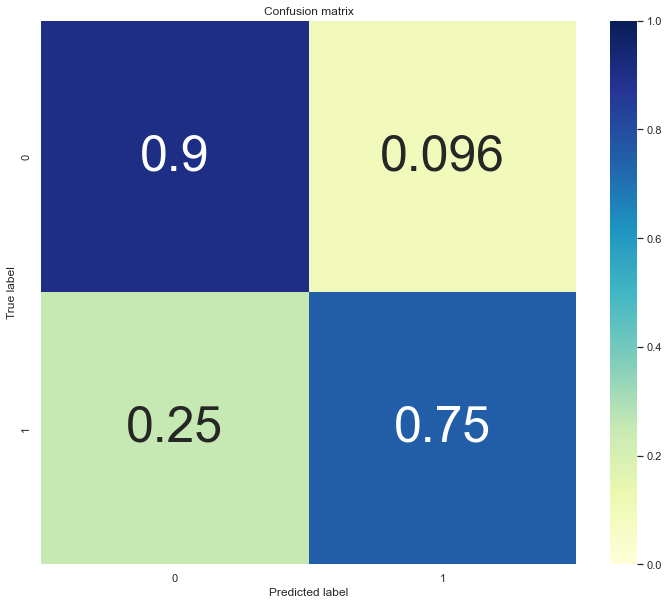

The CA of C parameter 69.51927961775606 is 0.8545:
The Logg Loss of C parameter 69.51927961775606 is 0.3305056563769058:



C:\Users\weron\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


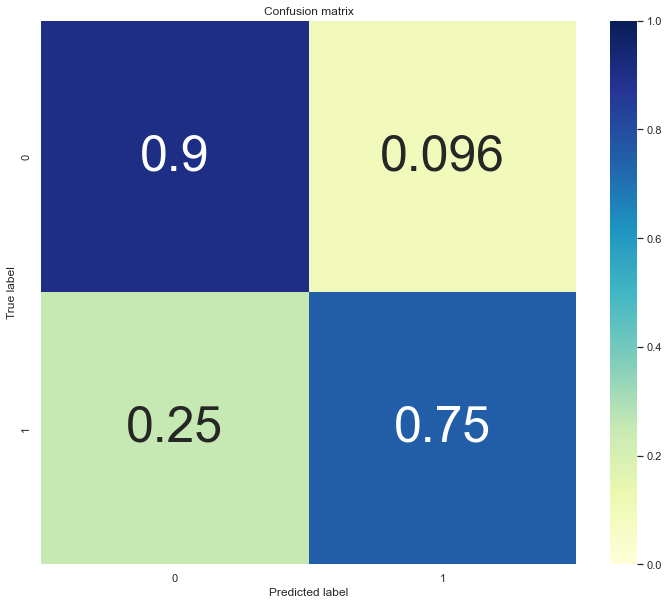

The CA of C parameter 233.57214690901213 is 0.8545:
The Logg Loss of C parameter 233.57214690901213 is 0.3305068635156039:



C:\Users\weron\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


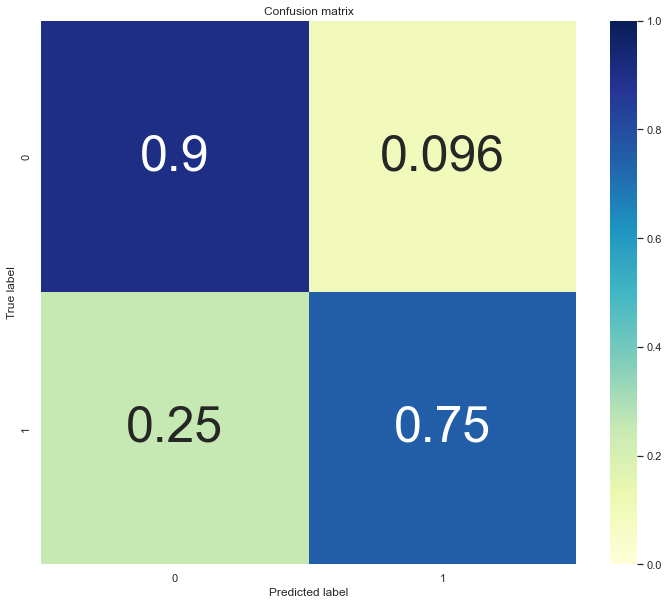

C:\Users\weron\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 784.7599703514607 is 0.8545:
The Logg Loss of C parameter 784.7599703514607 is 0.3305201182648002:



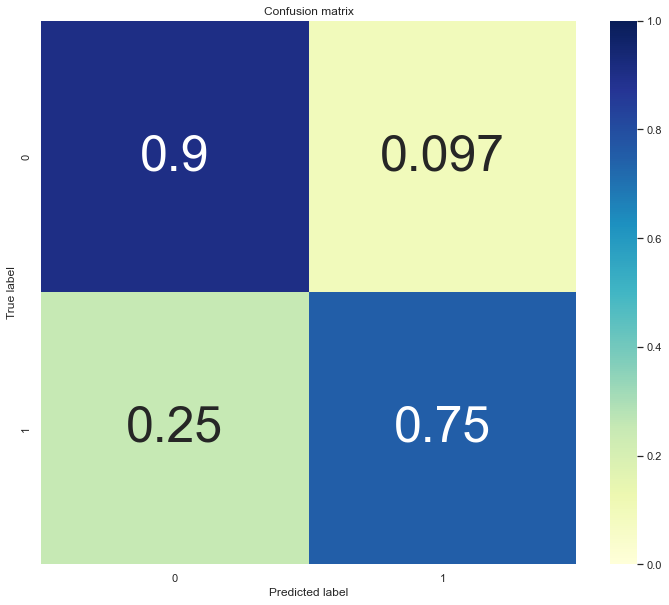

The CA of C parameter 2636.6508987303555 is 0.8545:
The Logg Loss of C parameter 2636.6508987303555 is 0.3304841864040145:



C:\Users\weron\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


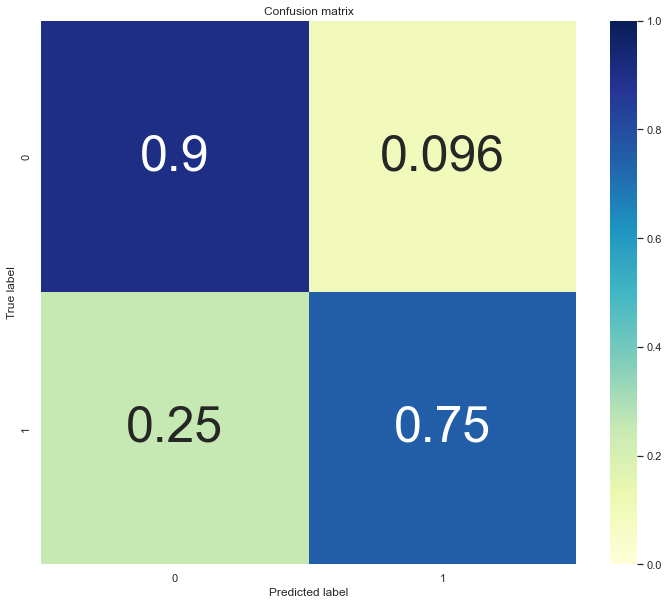

The CA of C parameter 8858.667904100832 is 0.854:
The Logg Loss of C parameter 8858.667904100832 is 0.33051459472617967:



C:\Users\weron\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


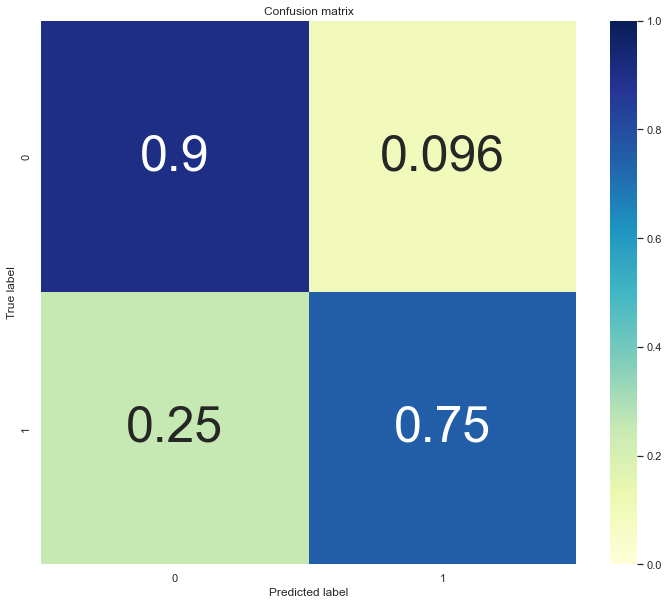

The CA of C parameter 29763.51441631313 is 0.8545:
The Logg Loss of C parameter 29763.51441631313 is 0.33048270094912535:



C:\Users\weron\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


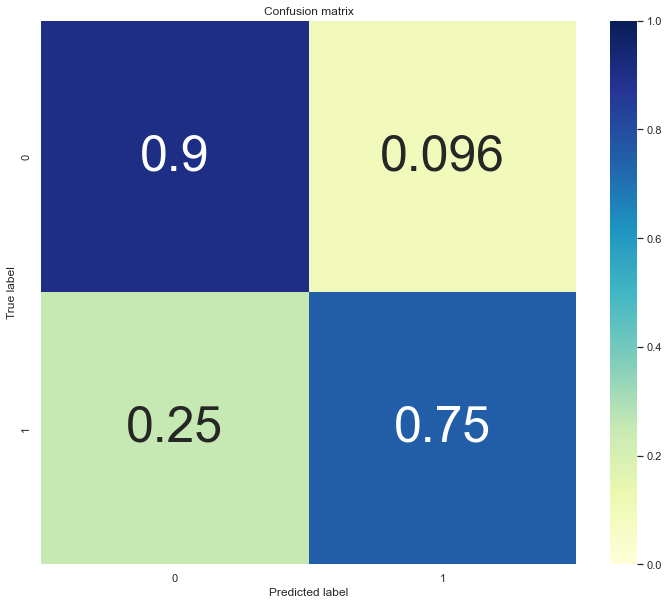

The CA of C parameter 100000.0 is 0.855:
The Logg Loss of C parameter 100000.0 is 0.3305251992479443:



C:\Users\weron\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


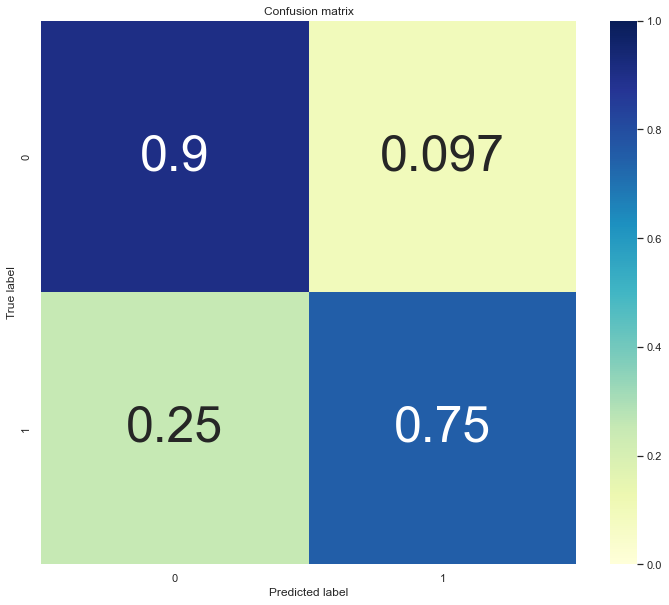

In [55]:
# Maybe we have a different metric we want to track

# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")
    
    y_pred = log_reg2.predict(X_train)
    cm = confusion_matrix(y_train, y_pred)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
    plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')
    plt.show()
  

In [56]:
# Training a Dummy Classifier

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
score = dummy_clf.score(X_test, y_test)

pred_proba_t = dummy_clf.predict_proba(X_test)
log_loss2 = log_loss(y_test, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)

Testing Acc: 0.7025
Log Loss: 10.275285977485929


<h2>Model końcowy z wybranymi parametrami<h2>

In [57]:
# Final Model 

log_reg3 = LogisticRegression(random_state=10, solver = 'lbfgs', C=784.759970)
log_reg3.fit(X_train, y_train)
score = log_reg3.score(X_valid, y_valid)

pred_proba_t = log_reg3.predict_proba(X_valid)
log_loss2 = log_loss(y_valid, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)

Testing Acc: 0.84375
Log Loss: 0.3521318823638703


C:\Users\weron\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h2>Jak wykorzystać taki model w praktyce/pracy?3 przykładowe zastosowania<h2>

*Opcja 1: Wdrożenie modelu w systemie CRM, chmurze lub narzędziach Viz i automatyczne podejmowanie decyzji, czy klient powinien otrzymać zatwierdzenie kredytu, czy nie.


*Opcja 2: Przeanalizuj czynniki, które wpływają na dobrą/złą pożyczkę i pomóż firmie to zrozumieć. Następnie firma może edukować swoich klientów, co muszą poprawić, aby otrzymać pożyczkę.

*Opcja 3: Wdrożenie tego modelu na otwartej stronie internetowej banku, gdzie klienci mogą automatycznie sprawdzić, czy ich kredyt zostanie zatwierdzony, czy nie; oszczędza to czas i koszty banku/przedsiębiorstwa.